# Milestone 2 Phase 1 - Malicious Web Detection
- Name: Gilbert Kurniawan H
- Batch: RMT 026
- Dateset: The dataset used [linked here](https://www.kaggle.com/datasets/xwolf12/malicious-and-benign-websites/data) is a dataset containing malicious and benign website collected using different verified sources of benign and malicious URL's in a low interactive client honeypot to isolate network traffic with additional tools to get other informastion such as Whois.
- Objective: To create Classification model to detect which website can be clasified as Malicious Website and not.

## Import Libraries
   > *Cell* pertama pada *notebook* **harus berisi dan hanya berisi** semua *library* yang digunakan dalam *project*.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import uniform, randint

from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from scipy.stats import skew
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.metrics import classification_report, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix,precision_score,recall_score,make_scorer


## Data Loading
   > Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head(10)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0
5,B0_2064,18,7,UTF-8,nginx,NaN,SC,Mahe,3/08/2016 14:30,3/10/2016 3:45,...,6,9,894,11,13,838,894,11,0.0,0
6,B0_462,18,6,iso-8859-1,Apache/2,345.0,US,CO,29/07/2002 0:00,1/07/2016 0:00,...,0,3,1189,14,13,8559,1327,14,2.0,0
7,B0_1128,19,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,US,FL,18/03/1997 0:00,19/03/2017 0:00,...,0,0,0,0,0,0,0,0,0.0,0
8,M2_17,20,5,utf-8,nginx/1.10.1,NaN,NaN,NaN,8/11/2014 7:41,NaN,...,0,0,0,2,3,213,146,2,2.0,1
9,M3_75,20,5,utf-8,nginx/1.10.1,NaN,NaN,NaN,8/11/2014 7:41,NaN,...,0,0,0,2,1,62,146,2,2.0,1


In [4]:
df.tail(10)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
1771,M4_43,170,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,2,124,0,0,0.0,1
1772,M4_61,173,34,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,1,1,90,1,5,416,90,1,0.0,1
1773,M4_39,178,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,3,186,0,0,0.0,1
1774,B0_156,183,29,ISO-8859-1,Microsoft-IIS/7.5; litigation_essentials.lexis...,4890.0,US,NY,26/06/1997 0:00,18/11/2014 0:00,...,2,7,2062,30,26,8161,2742,30,8.0,0
1775,M4_45,194,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,3,186,0,0,0.0,1
1776,M4_48,194,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,3,186,0,0,0.0,1
1777,M4_41,198,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,2,124,0,0,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,...,2,6,6631,87,89,132181,6945,87,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,CA,1/04/1998 0:00,9/12/2016 0:00,...,0,0,0,0,0,0,0,0,0.0,0
1780,B0_676,249,40,utf-8,Microsoft-IIS/8.5,24435.0,US,Wisconsin,14/11/2008 0:00,20/11/2013 0:00,...,6,11,2314,25,28,3039,2776,25,6.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [6]:
# Check Missing Values
df.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

Insight:
- This dataset contains 1781 rows and 21 columns.
- There is missing value in column `CHARSET`, `SERVER`, `WHOIS_COUNTRY`, `WHOIS_STATEPRO`, `WHOIS_REGDATE`, `WHOIS_UPDATED_DATE`, and `DNS_QUERY_TIMES` than needs to be handled in Feature Engineering later.

## Exploratory Data Analysis (EDA)
   > Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

**Explanation directly taken from the website:**

- **URL**: It is the anonymous identification of the URL analyzed in the study.
- **URL_LENGTH**: It is the number of characters in the URL.
- **NUMBER_SPECIAL_CHARACTERS**: It is the number of special characters identified in the URL, such as, “/”, “%”, “#”, “&”, “. “, “=”.
- **CHARSET**: It is a categorical value and its meaning is the character encoding standard (also called character set).
- **SERVER**: It is a categorical value and its meaning is the operative system of the server got from the packet response.
- **CONTENT_LENGTH**: It represents the content size of the HTTP header.
- **WHOIS_COUNTRY**: It is a categorical variable, its values are the countries we got from the server response (specifically, our script used the API of Whois).
- **WHOIS_STATEPRO**: It is a categorical variable, its values are the states we got from the server response (specifically, our script used the API of Whois).
- **WHOIS_REGDATE**: Whois provides the server registration date, so, this variable has date values with format DD/MM/YYY HH:MM.
- **WHOIS_UPDATED_DATE**: Through the Whois we got the last update date from the server analyzed.
- **TCP_CONVERSATION_EXCHANGE**: This variable is the number of TCP packets exchanged between the server and our honeypot client.
- **DIST_REMOTE_TCP_PORT**: It is the number of the ports detected and different to TCP.
- **REMOTE_IPS**: This variable has the total number of IPs connected to the honeypot.
- **APP_BYTES**: This is the number of bytes transferred.
- **SOURCE_APP_PACKETS**: Packets sent from the honeypot to the server.
- **REMOTE_APP_PACKETS**: Packets received from the server.
- **APP_PACKETS**: This is the total number of IP packets generated during the communication between the honeypot and the server.
- **DNS_QUERY_TIMES**: This is the number of DNS packets generated during the communication between the honeypot and the server.
- **TYPE**: This is a categorical variable, its values represent the type of web page analyzed, specifically, 1 is for malicious websites and 0 is for benign websites.

In [7]:
object_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(exclude=['object']).columns
print(object_columns)
print(numerical_columns)


Index(['URL', 'CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO',
       'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'],
      dtype='object')
Index(['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CONTENT_LENGTH',
       'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
       'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS',
       'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
       'DNS_QUERY_TIMES', 'Type'],
      dtype='object')


C:\Users\Gilbert KH\AppData\Local\Temp\ipykernel_15548\1657083537.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical_columns[i]], kde=False)
C:\Users\Gilbert KH\AppData\Local\Temp\ipykernel_15548\1657083537.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[numerical_columns[i+

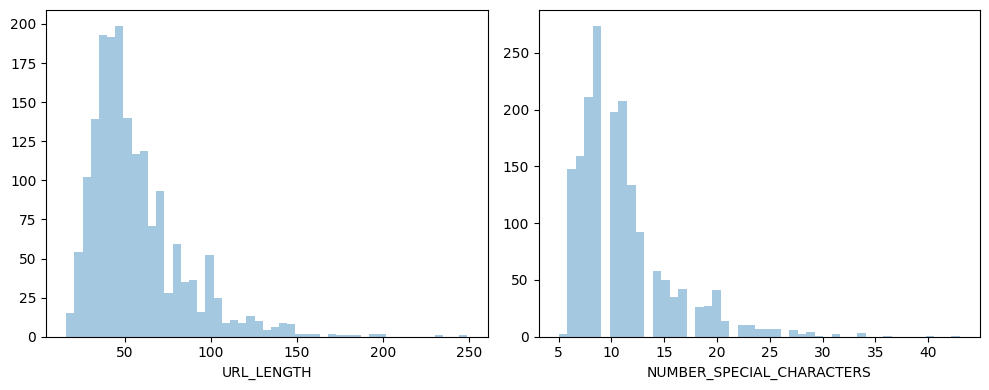

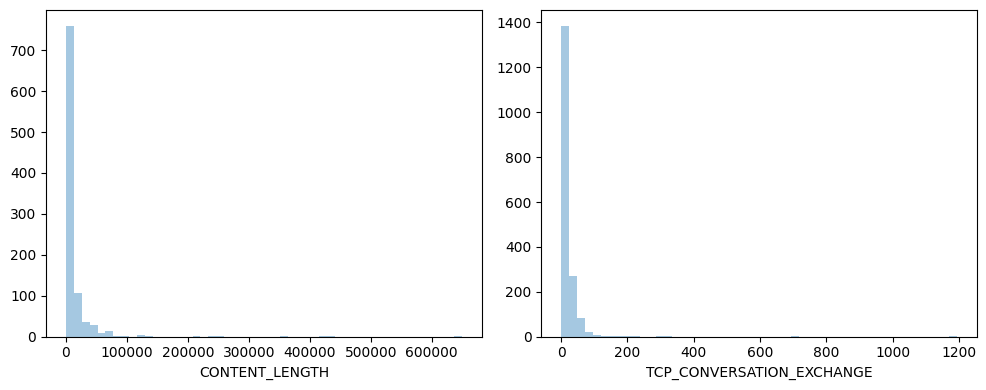

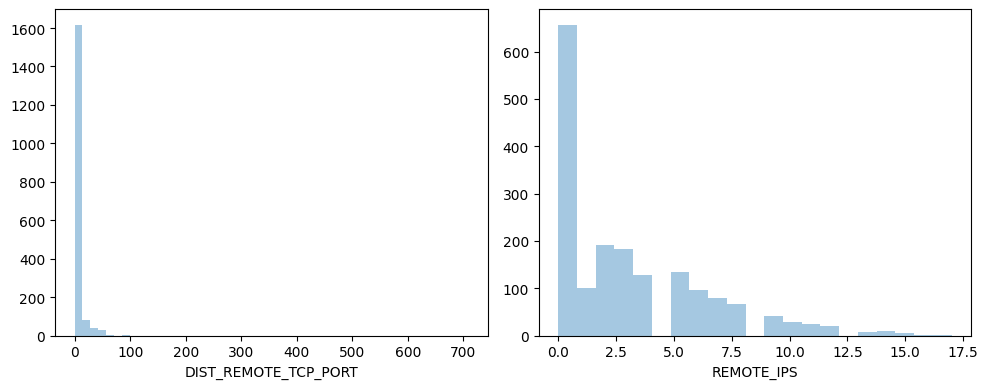

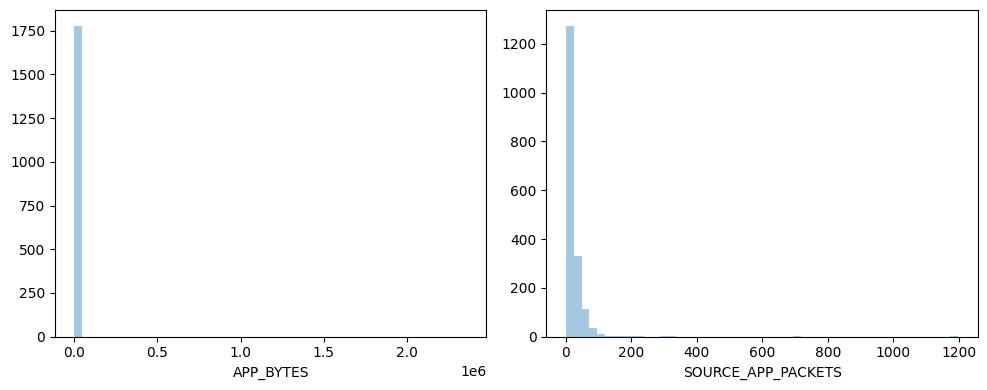

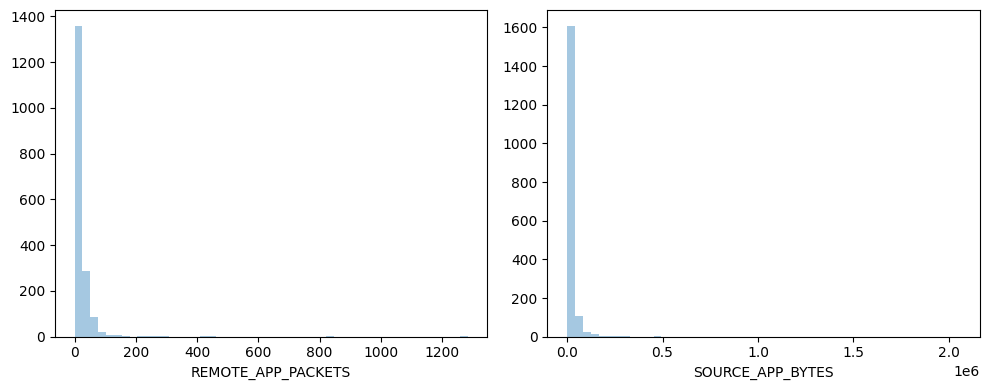

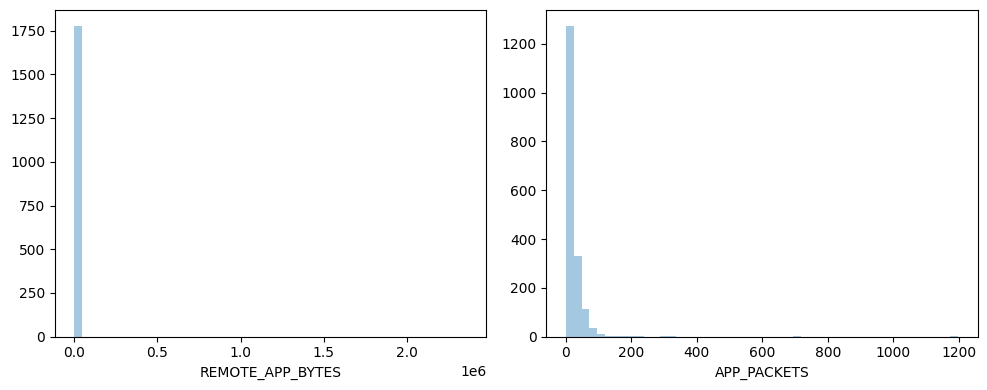

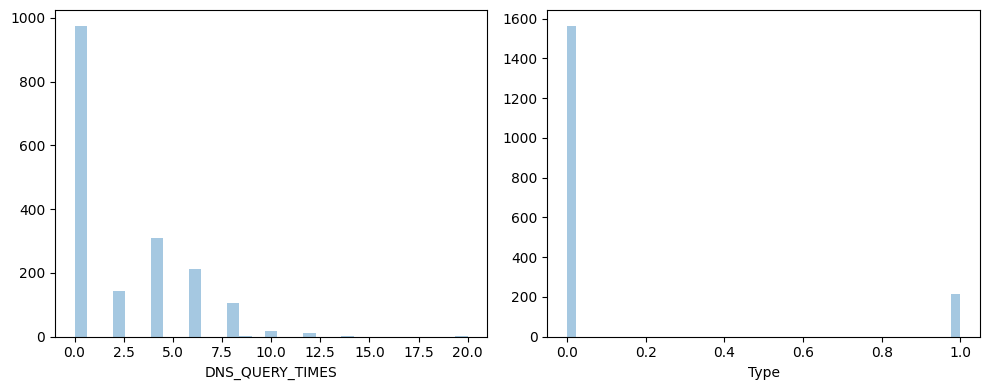

In [8]:
# plot all numerical columns to multiple boxplots based on index result of numerical_columns
for i in range(0,len(numerical_columns),2):
    if len(numerical_columns) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(df[numerical_columns[i]], kde=False)
        plt.subplot(122)
        sns.distplot(df[numerical_columns[i+1]], kde=False)
        plt.tight_layout()
        plt.show()

    else:
        sns.distplot(df[numerical_columns[i]], kde=False)
        plt.tight_layout()
        plt.show()

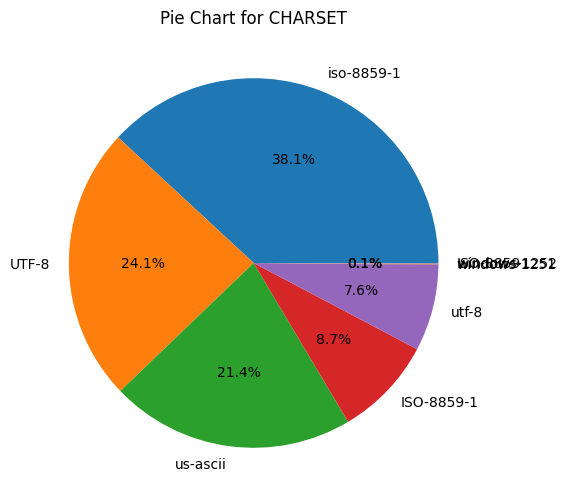

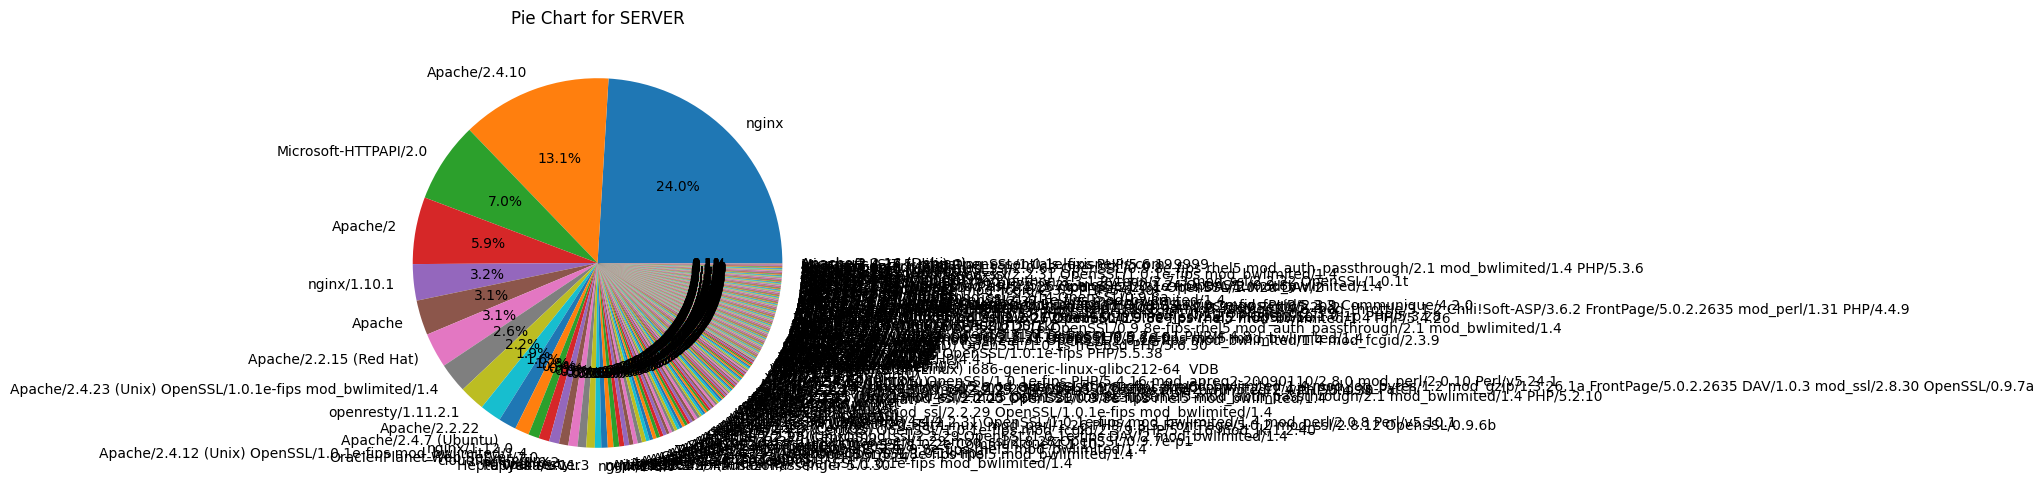

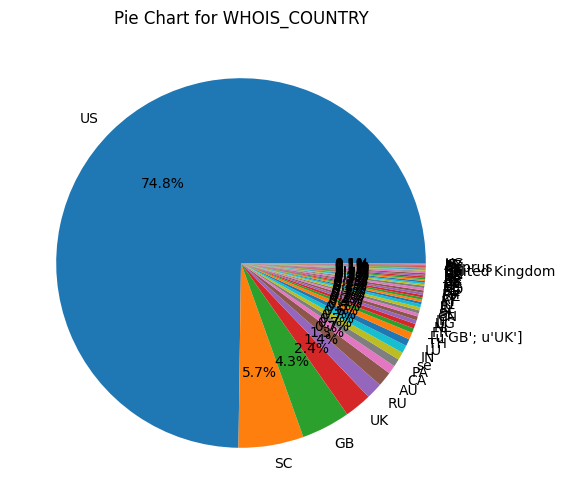

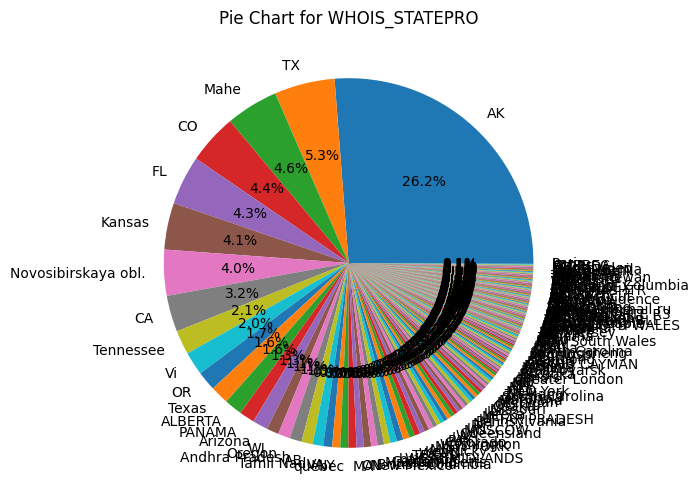

In [9]:
# Define the start and stop indices
start_index = 1
stop_index = len(object_columns) - 2

# Plot pie charts for object columns
for i in range(start_index, stop_index):
    plt.figure(figsize=(8, 6))
    labels = df[object_columns[i]].dropna().unique()
    plt.pie(df[object_columns[i]].value_counts(), labels=labels, autopct='%1.1f%%')
    plt.title(f'Pie Chart for {object_columns[i]}')
    plt.show()


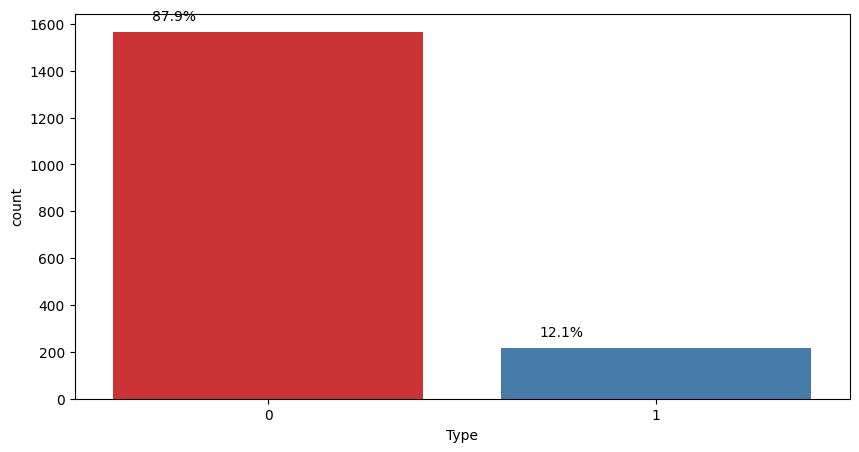

In [10]:
#plot on countplot and show percentage of each bar
plt.figure(figsize=(10,5))
ax = sns.countplot(x='Type', data=df, palette='Set1')
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/len(df)), (p.get_x()+0.1, p.get_height()+50))
plt.show()


Insight:
- 0 inside the dataset means `benign website` and 1 means `malicious website`.
- The data has imbalance dataset with about 87.9% of the data is `being website` and 12.1% of the data is `malicious website`.

In [11]:
# check date column variences and make new column       
df_check = df.copy()   

# print non null row which isn't in date format
columns_to_check = ['WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']

for column in columns_to_check:
    for i in df_check[column]:
        try:
            pd.to_datetime(i)
        except:
            print(f'Invalid date in column {column}: {i}')

C:\Users\Gilbert KH\AppData\Local\Temp\ipykernel_15548\1578076210.py:10: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  pd.to_datetime(i)
C:\Users\Gilbert KH\AppData\Local\Temp\ipykernel_15548\1578076210.py:10: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  pd.to_datetime(i)
C:\Users\Gilbert KH\AppData\Local\Temp\ipykernel_15548\1578076210.py:10: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  pd.to_datetime(i)
C:\Users\Gilbert KH\AppData\Local\Temp\ipykernel_15548\1578076210.py:10: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to si

Invalid date in column WHOIS_REGDATE: b
Invalid date in column WHOIS_REGDATE: 0
Invalid date in column WHOIS_REGDATE: b


C:\Users\Gilbert KH\AppData\Local\Temp\ipykernel_15548\1578076210.py:10: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  pd.to_datetime(i)
C:\Users\Gilbert KH\AppData\Local\Temp\ipykernel_15548\1578076210.py:10: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  pd.to_datetime(i)
C:\Users\Gilbert KH\AppData\Local\Temp\ipykernel_15548\1578076210.py:10: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  pd.to_datetime(i)
C:\Users\Gilbert KH\AppData\Local\Temp\ipykernel_15548\1578076210.py:10: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to si

Insight: 
- There are rows which aren't null in `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE` columns but in wrong format that can be handled later in Feature Engineering.

In [12]:
# Get numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Lists to hold column names
ex_skewed_cols = []
skewed_cols = []
normal_cols = []

# Loop through numeric columns
for col in numeric_cols:
    skewness = skew(df[col].dropna())
    if skewness > 1 or skewness < -1:
        ex_skewed_cols.append(col)
    elif skewness > 0.5 or skewness < -0.5:
        skewed_cols.append(col)
    else:
        normal_cols.append(col)

# Print grouped column names
print("Extremely skewed columns:")
for col in ex_skewed_cols:
    print(col)

print("\nSkewed columns:")
for col in skewed_cols:
    print(col)

print("\nNormally distributed columns:")
for col in normal_cols:
    print(col)

Extremely skewed columns:
URL_LENGTH
NUMBER_SPECIAL_CHARACTERS
CONTENT_LENGTH
TCP_CONVERSATION_EXCHANGE
DIST_REMOTE_TCP_PORT
REMOTE_IPS
APP_BYTES
SOURCE_APP_PACKETS
REMOTE_APP_PACKETS
SOURCE_APP_BYTES
REMOTE_APP_BYTES
APP_PACKETS
DNS_QUERY_TIMES
Type

Skewed columns:

Normally distributed columns:


### Heatmap Analysis

Pearson: Normally Distributed <br>
Kendall: Skewed Distributed

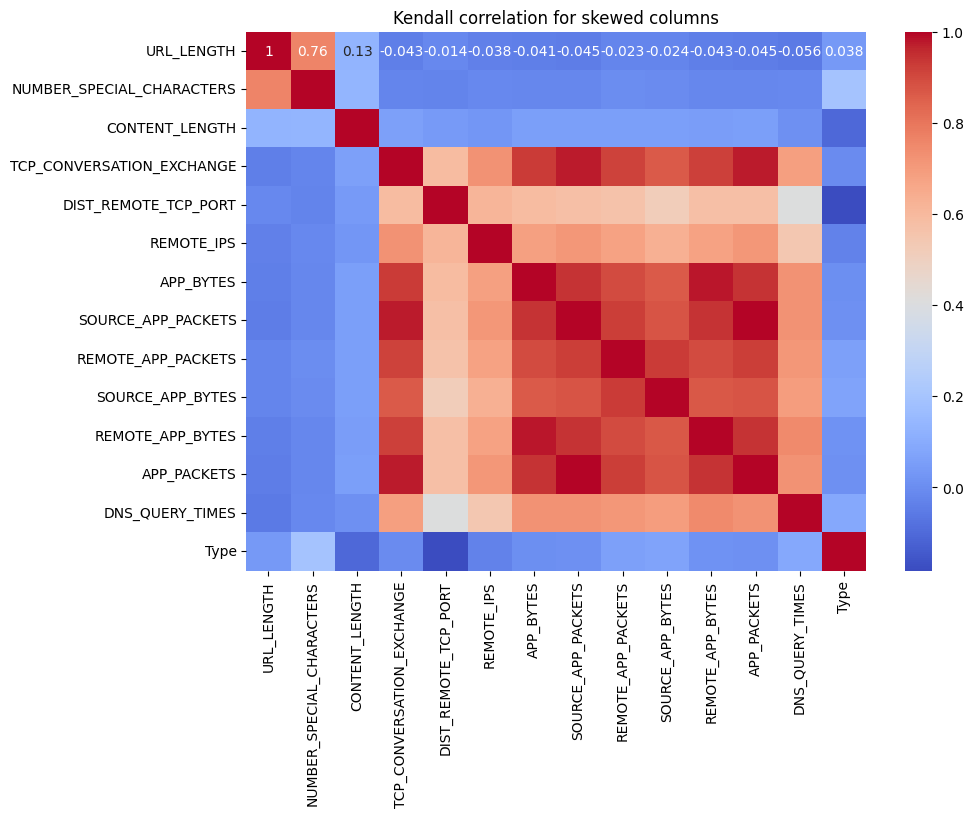

In [13]:
# Calculate and plot correlation for skewed columns
if ex_skewed_cols:
    plt.figure(figsize=(10, 7))
    sns.heatmap(df[ex_skewed_cols].corr(method='kendall'), cmap='coolwarm', annot=True)
    plt.title("Kendall correlation for skewed columns")
    plt.show()

#### Check pattern of data which are Malicious

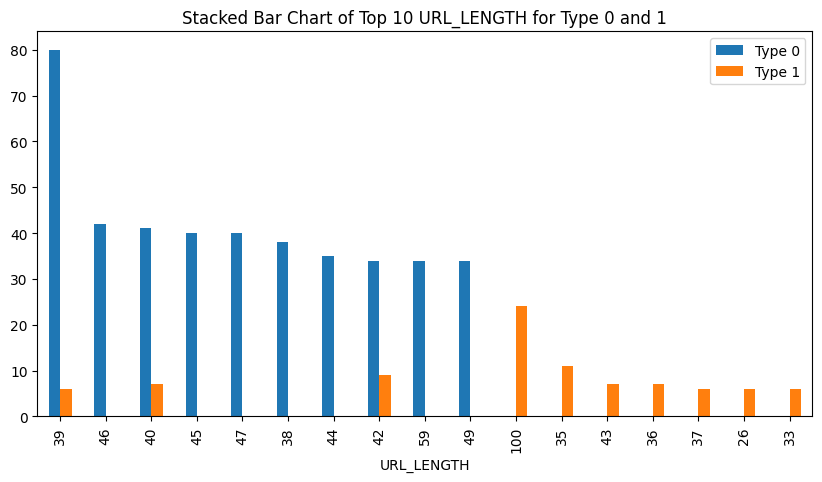

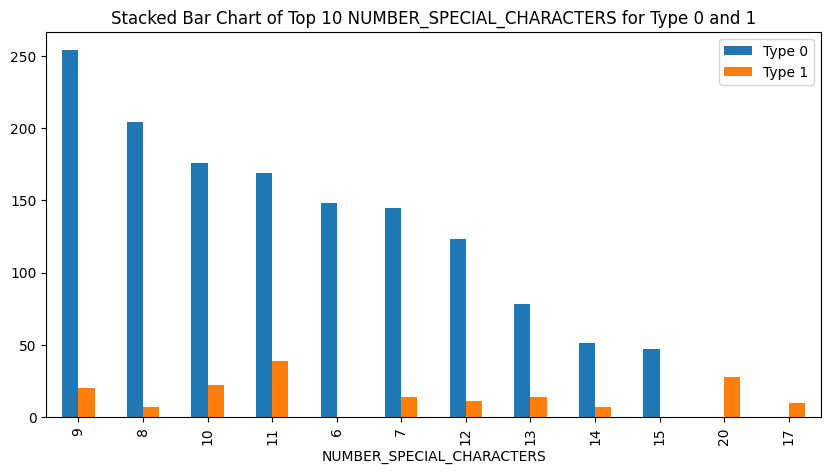

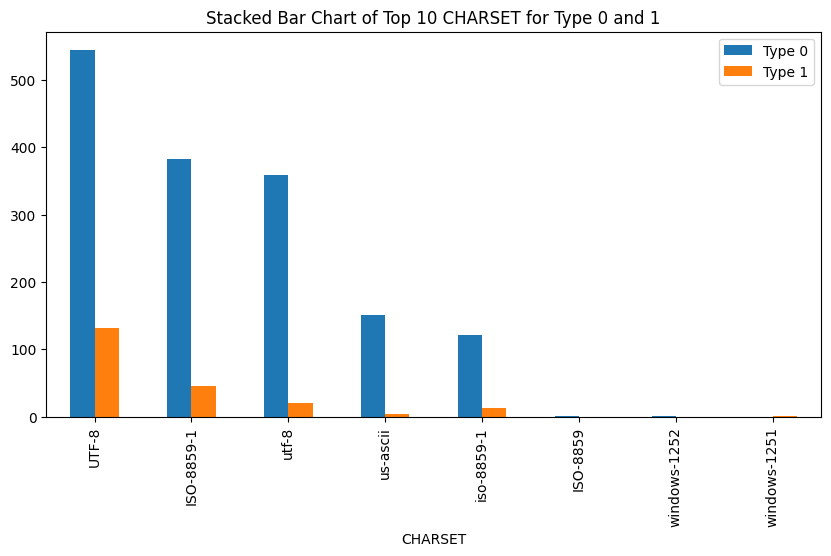

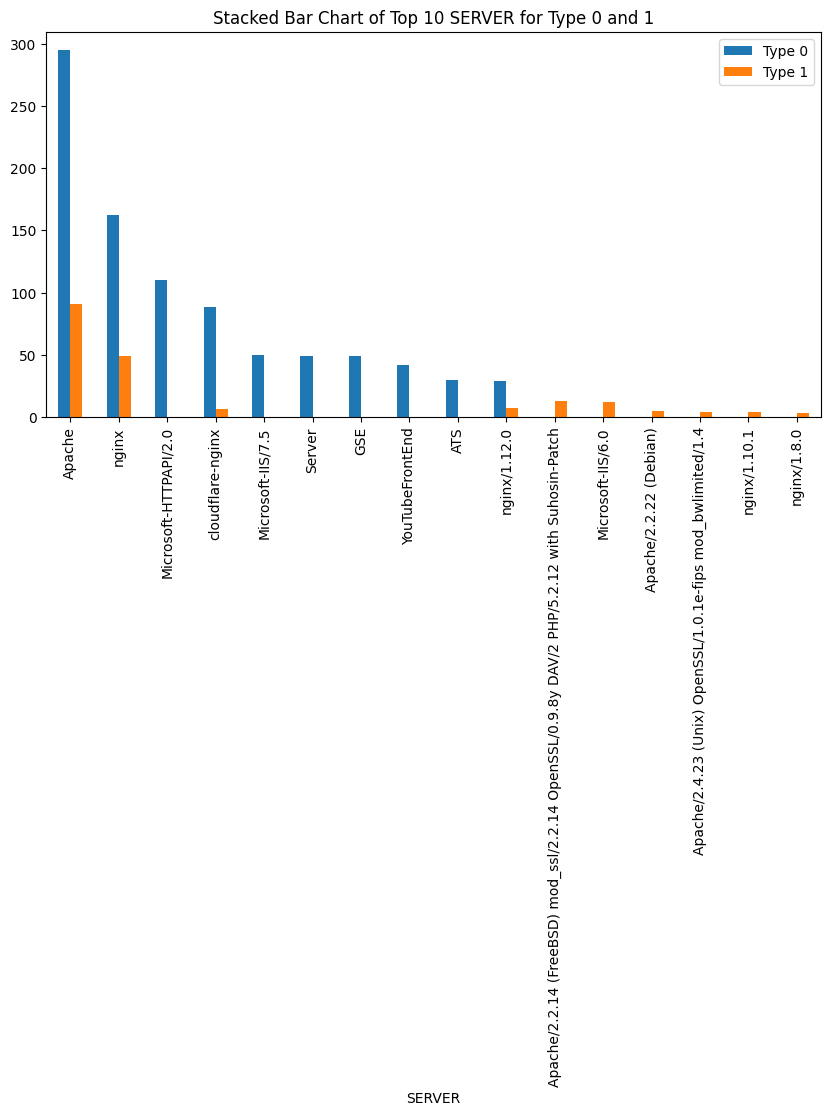

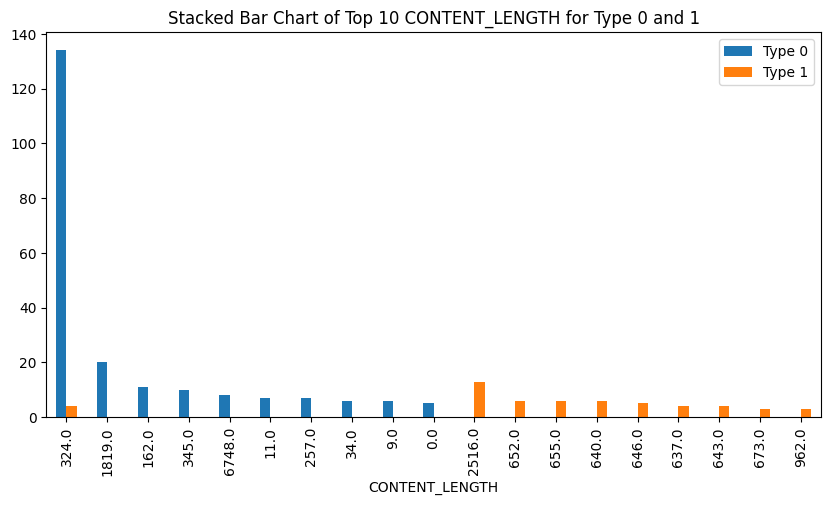

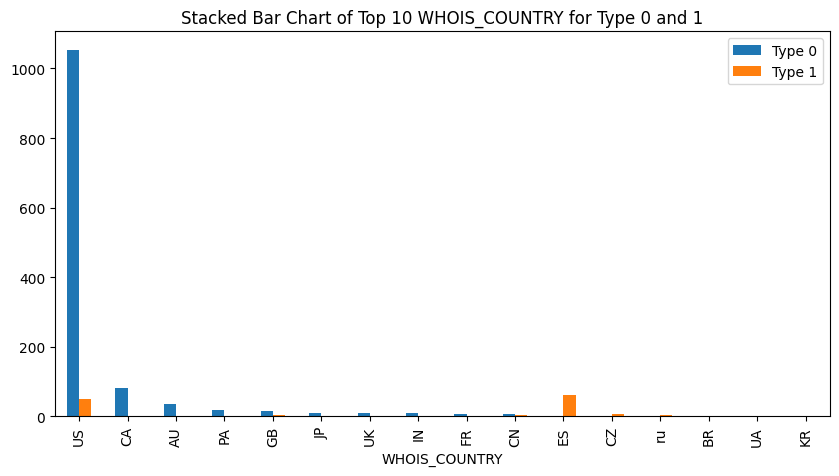

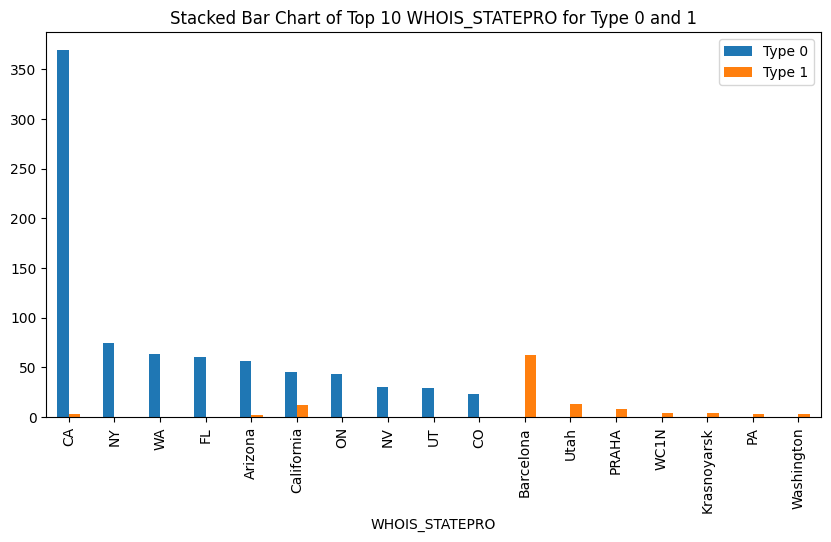

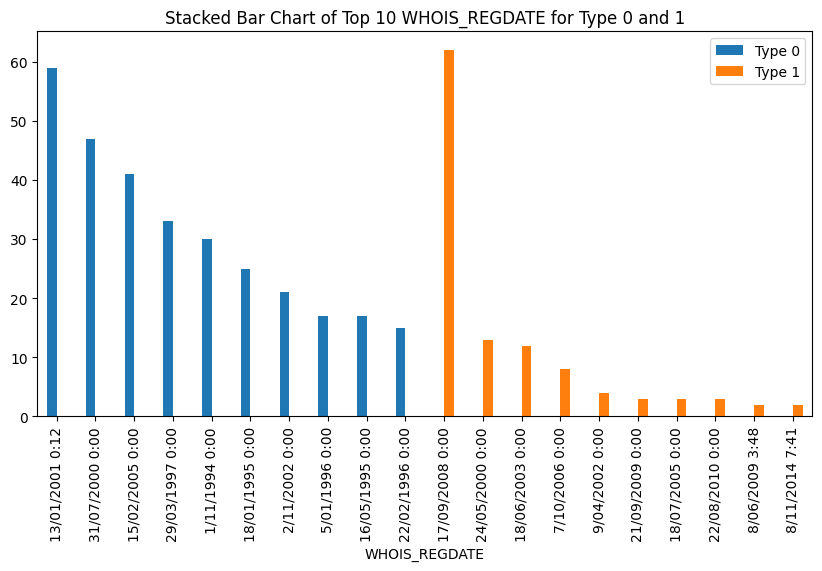

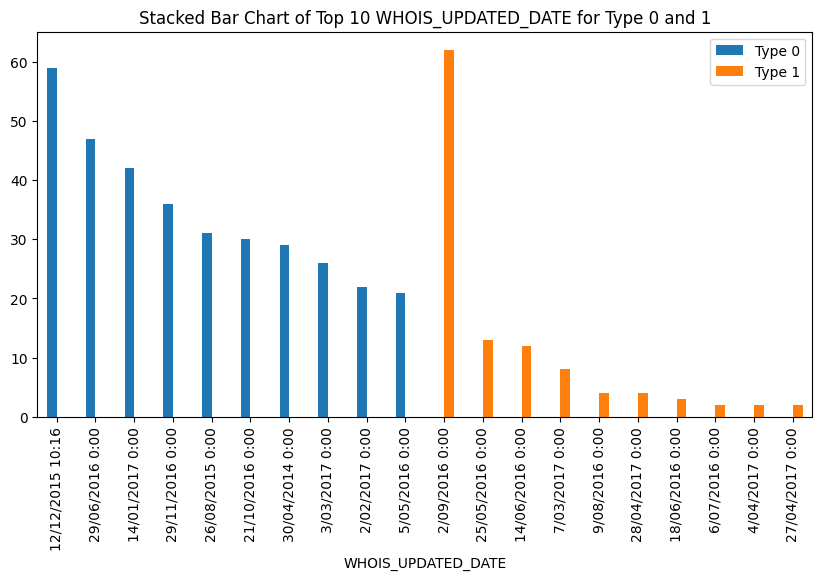

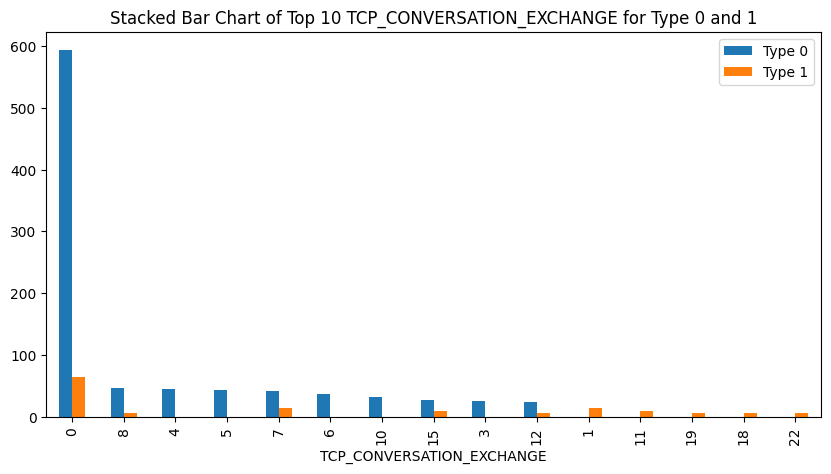

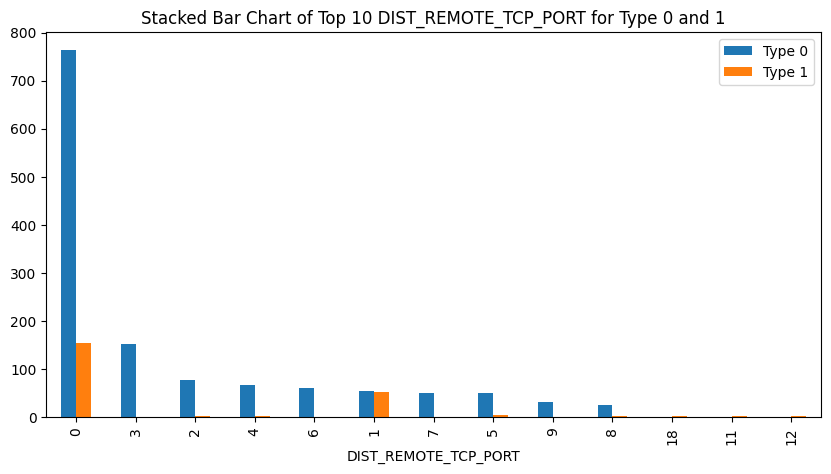

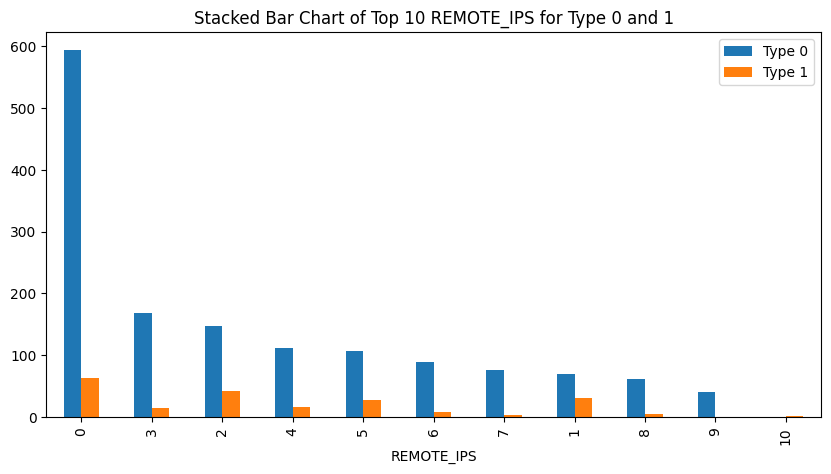

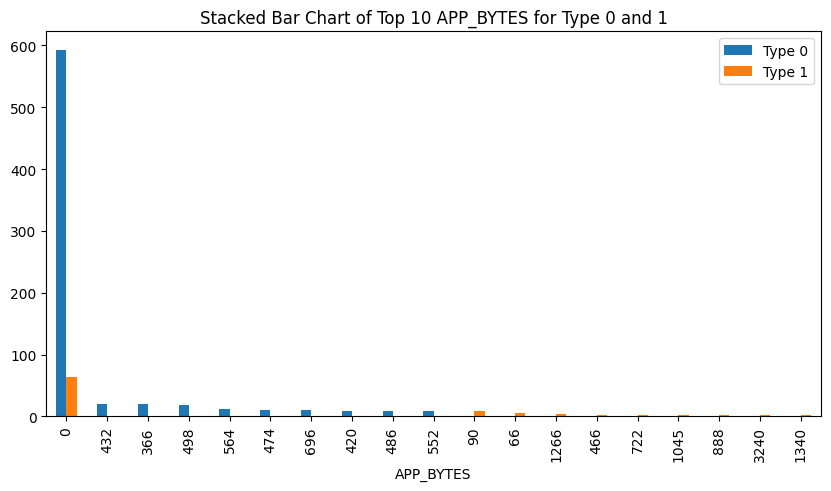

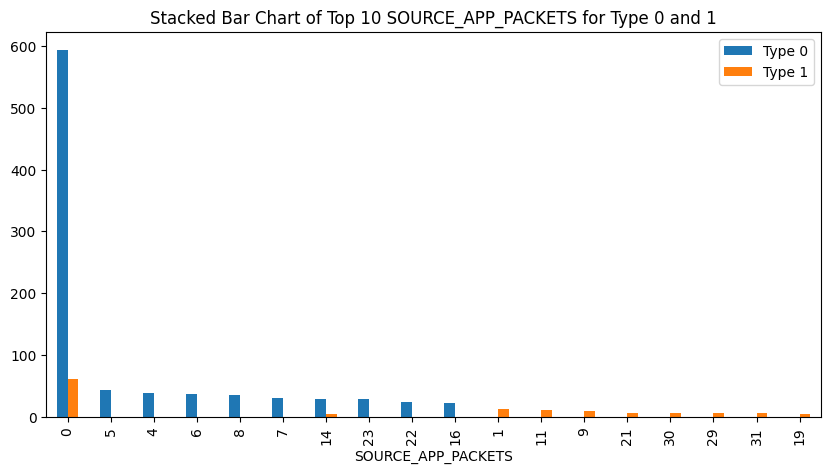

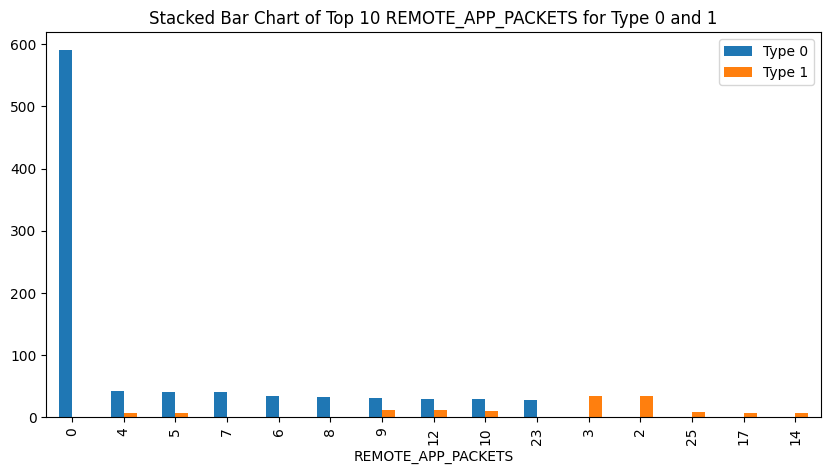

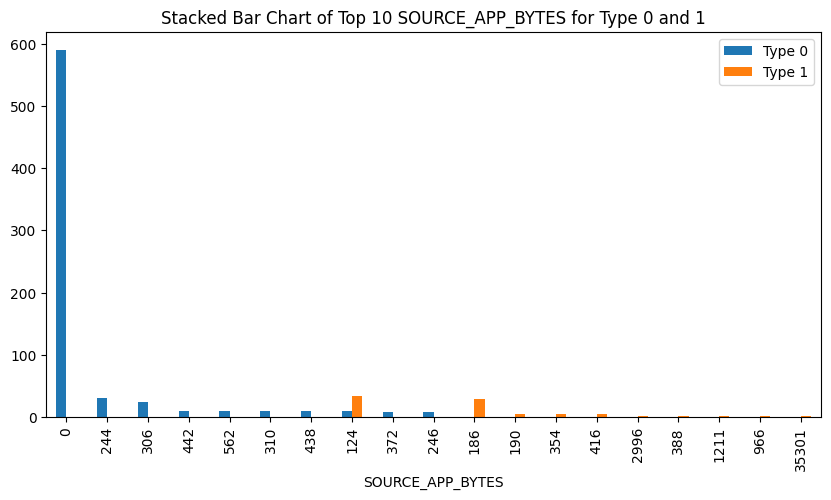

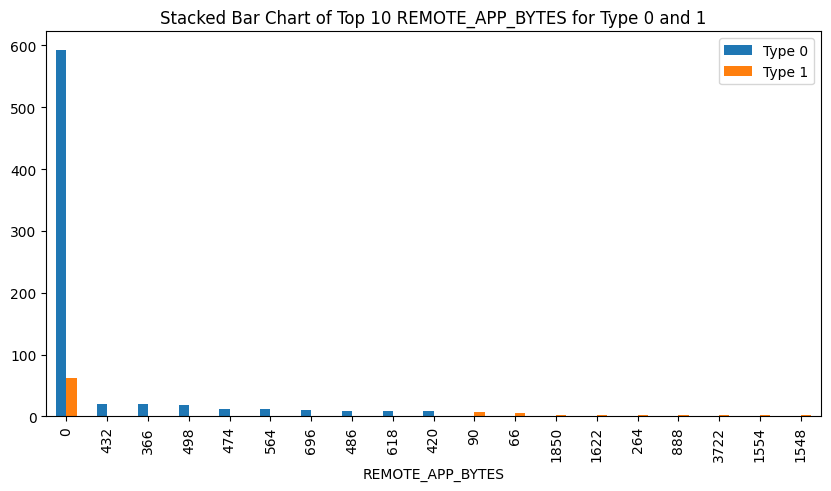

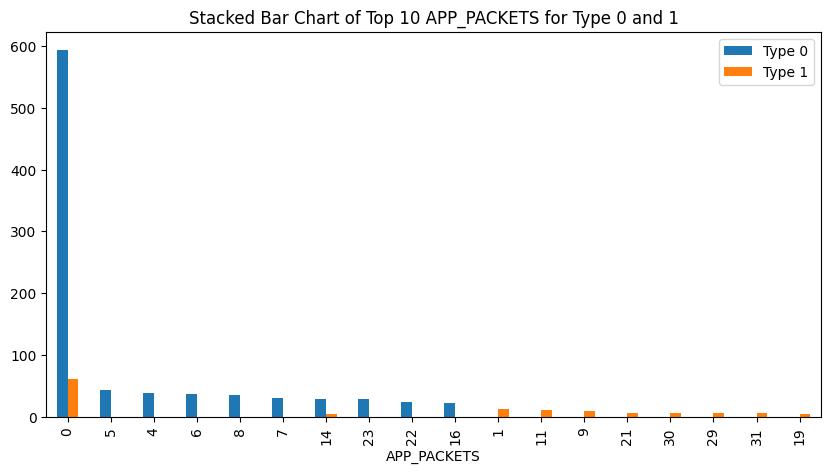

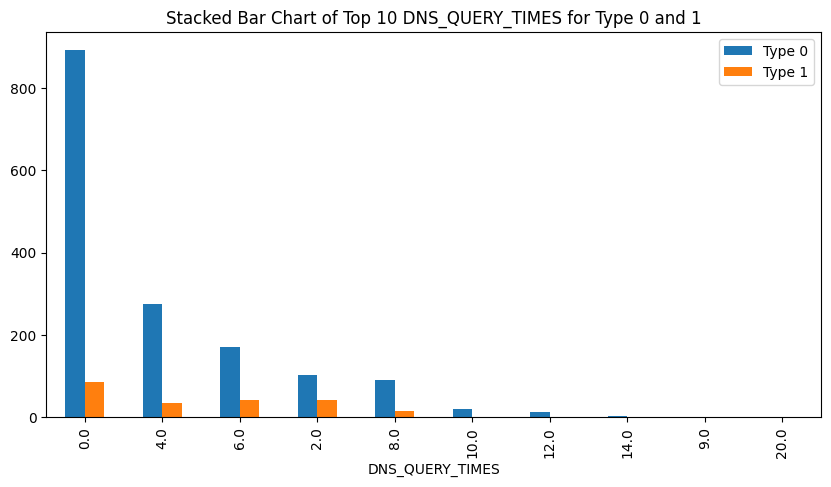

In [14]:
for col in df.columns:
    if (col != 'Type') & (col != 'URL'):
        # Get the top 10 values for each type
        top_10_type_0 = df[df['Type'] == 0][col].value_counts().nlargest(10)
        top_10_type_1 = df[df['Type'] == 1][col].value_counts().nlargest(10)
        
        # Combine the two series into a DataFrame
        top_10_df = pd.concat([top_10_type_0, top_10_type_1], axis=1, keys=['Type 0', 'Type 1'])
        
        # Plot a stacked bar chart
        top_10_df.plot(kind='bar', figsize=(10, 5))
        plt.title(f'Stacked Bar Chart of Top 10 {col} for Type 0 and 1')
        plt.show()

Things to be handled:
- Missing value in `CHARSET`, `SERVER`, `WHOIS_COUNTRY`, `WHOIS_STATEPRO`, `WHOIS_REGDATE`, `WHOIS_UPDATED_DATE`, and `DNS_QUERY_TIMES` columns.
- Wrong date format in `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE` columns.
- Outlier handling for the numerical columns.
- Scaling for the numerical columns and Encoding for the categorical columns.
- Imbalance dataset handling.

Columns to be dropped:
- `URL`: because it is unique for each row and not needed for the model.

## Feature Engineering
   > Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

In [15]:
df_cleaning = df.copy()

In [16]:
# Remove all traling whitespaces in string / object row values
df_cleaning = df_cleaning.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


### Fixing dates columns

In [17]:
def fill_date_null(df, date_col):
    df[date_col] = df[date_col].replace(0, np.nan)
    df[date_col] = df[date_col].replace('b', np.nan)
    df[date_col] = df[date_col].replace('None', np.nan)
    
    # split date and time
    if df[date_col].str.contains('T').any():
        df[date_col] = df[date_col].str.split('T', expand=True)[0]
    if df[date_col].str.contains(' ').any():
        df[date_col] = df[date_col].str.split(' ', expand=True)[0]
        
    # get specific row with value "2002/03/20"
    if df[date_col].str.contains('2002/03/20').any():
        # only convert 1 row with value "2002/03/20" to 
        df[date_col] = df[date_col].replace('2002/03/20', '20/03/2002')
        
    return df

In [18]:
df_cleaning = fill_date_null(df_cleaning, 'WHOIS_REGDATE')

In [19]:
df_cleaning = fill_date_null(df_cleaning, 'WHOIS_UPDATED_DATE')

In [20]:
df_cleaning["WHOIS_REGDATE"] = pd.to_datetime(df_cleaning.WHOIS_REGDATE, format="%d/%m/%Y", errors="coerce")
df_cleaning["WHOIS_REGDATE"].value_counts(dropna=False).sort_index()

WHOIS_REGDATE
1990-07-26      1
1990-12-12      4
1992-01-10      1
1992-02-21      2
1993-06-03      2
             ... 
2017-02-13      1
2017-03-11      1
2017-03-22      1
2017-04-14      1
NaT           135
Name: count, Length: 870, dtype: int64

In [21]:
df_cleaning["WHOIS_UPDATED_DATE"] = pd.to_datetime(df_cleaning.WHOIS_UPDATED_DATE, format="%d/%m/%Y", errors="coerce")
df_cleaning["WHOIS_UPDATED_DATE"].value_counts(dropna=False).sort_index()

WHOIS_UPDATED_DATE
2008-07-14      1
2008-12-13      1
2009-06-02      1
2009-09-30      1
2011-07-20      1
             ... 
2017-04-26      1
2017-04-27      4
2017-04-28      7
2017-04-29      2
NaT           144
Name: count, Length: 529, dtype: int64

In [22]:
df_cleaning.isnull().sum()  

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                135
WHOIS_UPDATED_DATE           144
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

### Column Dropping

In [23]:
# drop specific column
df_cleaning = df_cleaning.drop(columns=['URL'])
df_cleaning

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,iso-8859-1,nginx,263.0,NaN,NaN,2015-10-10,NaT,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaT,NaT,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaT,NaT,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,ISO-8859-1,nginx,162.0,US,AK,1997-10-07,2013-09-12,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,UTF-8,NaN,124140.0,US,TX,1996-05-12,2017-04-11,57,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,16,UTF-8,Apache,NaN,ES,Barcelona,2008-09-17,2016-09-02,0,0,0,0,0,3,186,0,0,0.0,1
1777,198,17,UTF-8,Apache,NaN,ES,Barcelona,2008-09-17,2016-09-02,0,0,0,0,0,2,124,0,0,0.0,1
1778,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,1999-02-15,2015-07-15,83,2,6,6631,87,89,132181,6945,87,4.0,0
1779,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,CA,1998-04-01,2016-12-09,0,0,0,0,0,0,0,0,0,0.0,0


### Dataset splitting

In [24]:
# Let's separate into training and testing set in order to build machine learning models

## For data without reduced cabins
X_train, X_test, y_train, y_test = train_test_split(df_cleaning, df_cleaning['Type'], test_size=0.3, random_state=0)

## Show shapes
X_train.shape, X_test.shape

((1246, 20), (535, 20))

### Missing Value Handling

In [25]:
# Check Missing Values
X_train.isnull().sum()

URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        4
SERVER                       126
CONTENT_LENGTH               563
WHOIS_COUNTRY                211
WHOIS_STATEPRO               246
WHOIS_REGDATE                 86
WHOIS_UPDATED_DATE            95
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                0
Type                           0
dtype: int64

In [26]:
# check row where statepor is null but not country
X_train_check = X_train[X_train['WHOIS_STATEPRO'].isnull()]
X_train_check = X_train_check[X_train_check['WHOIS_COUNTRY'].notnull()]
X_train_check.head(10)

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
241,33,8,UTF-8,Apache/2.2.31 (Amazon),1371.0,IL,NaN,2003-04-28,2017-04-29,19,0,3,2042,27,27,4760,2622,27,8.0,0
580,41,9,ISO-8859-1,nginx,NaN,FR,NaN,2005-07-22,2016-07-21,0,0,0,0,0,0,0,0,0,0.0,0
840,48,9,us-ascii,Microsoft-HTTPAPI/2.0,324.0,KR,NaN,2000-08-14,2016-07-06,7,7,3,618,7,9,562,618,7,0.0,0
1261,63,11,utf-8,DMS/1.0.42,42913.0,FR,NaN,2005-03-15,2016-06-28,44,5,9,3414,48,46,47213,3722,48,4.0,0
769,46,8,UTF-8,cloudflare-nginx,NaN,PH,NaN,2000-07-08,2016-03-05,12,0,3,1716,16,17,11285,2012,16,4.0,0
406,38,10,utf-8,Microsoft-IIS/8.0,4929.0,NO,NaN,2004-01-29,2016-12-29,16,0,5,1927,20,20,8052,2219,20,4.0,0
1347,69,11,UTF-8,nginx/1.8.1,12564.0,UK,NaN,1993-06-03,2016-11-02,0,0,0,0,0,0,0,0,0,0.0,0
685,44,9,ISO-8859-1,nginx/1.13.0,NaN,FR,NaN,2005-10-05,2015-05-21,6,0,1,672,8,8,1381,834,8,2.0,0
15,21,7,ISO-8859-1,Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_b...,957.0,UK,NaN,2000-07-16,2015-07-04,7,0,1,717,11,10,1960,1011,11,4.0,1
1402,72,12,UTF-8,NaN,NaN,KR,NaN,1997-09-06,2016-01-11,0,0,0,0,0,0,0,0,0,0.0,0


In [27]:
# list all unique value in WHOIS_COUNTRY
list_country = X_train_check['WHOIS_COUNTRY'].unique()
list_country

array(['IL', 'FR', 'KR', 'PH', 'NO', 'UK', 'JP', 'se', 'CZ', 'BE', 'GB',
       'Cyprus', 'AU', 'DE', 'SE', 'TR', 'CN', 'BR'], dtype=object)

In [28]:
# check WHOIS_COUNTRY row where WHOIS_STATEPRO is same as list_country which WHOIS_STATEPRO is null
X_train_check = X_train[X_train['WHOIS_COUNTRY'].isin(list_country)]
X_train_check = X_train_check[X_train_check['WHOIS_STATEPRO'].notnull()]

# find all combination of WHOIS_COUNTRY and WHOIS_STATEPRO inside X_train_check
list_country_state = X_train_check.groupby(['WHOIS_COUNTRY', 'WHOIS_STATEPRO']).size().reset_index(name='count')
list_country_state

,WHOIS_COUNTRY,WHOIS_STATEPRO,count
0,AU,NEW SOUTH WALES,1
1,AU,NSW,3
2,AU,New South Wales,2
3,AU,QLD,1
4,AU,Queensland,9
5,AU,VIC,1
6,AU,Vi,1
7,CN,Bei Jing,1
8,CN,Zhejiang,1
9,CN,beijingshi,1


Insight: 
- 3 country that can be handled.
- UK, TR, IL which the WHOIS_STATEPRO is same ase the country. we can fill the missing value in WHOIS_STATEPRO with the country for that specific location. The rest of is we can fill with unknown.

In [29]:
# fill null value in WHOIS_STATEPRO in null for UK, TR, IL with the same value in WHOIS_COUNTRY
X_train.loc[(X_train['WHOIS_COUNTRY'] == 'UK') & (X_train['WHOIS_STATEPRO'].isnull()), 'WHOIS_STATEPRO'] = 'UK'
X_train.loc[(X_train['WHOIS_COUNTRY'] == 'TR') & (X_train['WHOIS_STATEPRO'].isnull()), 'WHOIS_STATEPRO'] = 'TR'
X_train.loc[(X_train['WHOIS_COUNTRY'] == 'IL') & (X_train['WHOIS_STATEPRO'].isnull()), 'WHOIS_STATEPRO'] = 'il'

# for test
X_test.loc[(X_test['WHOIS_COUNTRY'] == 'UK') & (X_test['WHOIS_STATEPRO'].isnull()), 'WHOIS_STATEPRO'] = 'UK'
X_test.loc[(X_test['WHOIS_COUNTRY'] == 'TR') & (X_test['WHOIS_STATEPRO'].isnull()), 'WHOIS_STATEPRO'] = 'TR'
X_test.loc[(X_test['WHOIS_COUNTRY'] == 'IL') & (X_test['WHOIS_STATEPRO'].isnull()), 'WHOIS_STATEPRO'] = 'il'

# fill the rest of null value in WHOIS_STATEPRO with "unknown"
X_train['WHOIS_STATEPRO'] = X_train['WHOIS_STATEPRO'].fillna('unknown')
X_test['WHOIS_STATEPRO'] = X_test['WHOIS_STATEPRO'].fillna('unknown')

In [30]:
# check row where statepor is null but not country
X_train_check = X_train[X_train['WHOIS_COUNTRY'].isnull()]
X_train_check = X_train_check[X_train_check['WHOIS_STATEPRO'].notnull()]


Insight:
- it seems WHOIS_COUNTRY which are null are WHOIS_STATEPRO is also null. We will fill WHOIS_COUNTRY with unknown.

In [31]:
# fill missing value in WHOIS_COUNTRY with "unknown"
X_train['WHOIS_COUNTRY'] = X_train['WHOIS_COUNTRY'].fillna('unknown')
X_test['WHOIS_COUNTRY'] = X_test['WHOIS_COUNTRY'].fillna('unknown')

In [32]:
# check missing value in CHARSET and SERVER
X_train_check = X_train[X_train['CHARSET'].isnull()]
X_train_check = X_train[X_train['SERVER'].notnull()]
X_train_check

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
579,41,9,ISO-8859-1,Apache,NaN,AU,Queensland,2006-03-22,2017-03-22,0,0,0,0,0,0,0,0,0,0.0,0
651,43,9,ISO-8859-1,cloudflare-nginx,NaN,CA,Quebec,2002-04-10,2016-06-09,20,4,7,1511,22,21,14430,1663,22,2.0,0
1629,100,20,UTF-8,Apache,NaN,ES,Barcelona,2008-09-17,2016-09-02,0,0,0,0,0,3,186,0,0,0.0,1
960,52,10,UTF-8,Apache,NaN,US,CA,1998-04-14,2017-04-14,0,0,0,0,0,0,0,0,0,0.0,0
527,40,8,UTF-8,Apache/2.2.23 (Amazon),11590.0,US,New York,2005-09-26,2011-07-23,156,17,12,23383,162,206,295213,23877,162,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,48,10,UTF-8,Apache/2.4.6 (CentOS) OpenSSL/1.0.1e-fips PHP/...,NaN,AU,unknown,2006-07-20,2013-03-05,0,0,0,0,0,0,0,0,0,0.0,0
1216,61,9,ISO-8859-1,Microsoft-IIS/7.5,11.0,US,WA,2000-09-13,2016-08-29,0,0,0,0,0,0,0,0,0,0.0,0
1653,101,20,utf-8,nginx,NaN,US,California,2006-09-24,2015-08-26,45,40,4,4721,49,74,82395,5009,49,4.0,0
559,41,9,UTF-8,nginx/1.12.0,NaN,US,Pennsylvania,2007-09-08,2016-09-09,0,0,0,0,0,0,0,0,0,0.0,0


In [33]:
# sort by null first in CHARSET
X_train_check = X_train[X_train['CHARSET'].isnull()].sort_values(by=['CHARSET'], ascending=False)

X_train_check

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
35,23,6,NaN,NaN,NaN,US,TX,1996-07-30,2016-07-04,19,7,6,2404,23,20,6179,2684,23,4.0,0
81,26,6,NaN,tsa_c,0.0,US,CA,2000-01-21,2016-11-08,43,39,3,6325,53,50,32025,7063,53,10.0,0
125,29,6,NaN,tsa_c,0.0,US,CA,2000-01-21,2016-11-08,0,0,0,0,0,0,0,0,0,0.0,0
952,52,14,NaN,Apache/2.4.6 (CentOS),NaN,CN,Bei Jing,2005-03-01,2016-09-07,14,1,8,1151,18,15,1211,1445,18,4.0,1


Insight:
- We cant find pattern for CHARSET to any other columns. We will fill the missing value with unknown.

In [34]:
# fill missing value in CHARSET with "unknown"
X_train['CHARSET'] = X_train['CHARSET'].fillna('unknown')
X_test['CHARSET'] = X_test['CHARSET'].fillna('unknown')

In [35]:
# handle missing Server value with unknown
X_train['SERVER'] = X_train['SERVER'].fillna('unknown')
X_test['SERVER'] = X_test['SERVER'].fillna('unknown')


In [36]:
X_train.isnull().sum()

URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        0
SERVER                         0
CONTENT_LENGTH               563
WHOIS_COUNTRY                  0
WHOIS_STATEPRO                 0
WHOIS_REGDATE                 86
WHOIS_UPDATED_DATE            95
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                0
Type                           0
dtype: int64

#### Fill missing value in Content_Length, WHOIS_REGDATE, WHOIS_UPDATED_DATE with median

In [37]:
# first create new column label which row have null value in content_length (1 = null, 0 = not null)
X_train['label'] = np.where(X_train['CONTENT_LENGTH'].isnull(), 1, 0)
X_test['label'] = np.where(X_test['CONTENT_LENGTH'].isnull(), 1, 0)

# fill null content_length with median of not null content_length cheked from label column
X_train['CONTENT_LENGTH'] = X_train['CONTENT_LENGTH'].fillna(X_train[X_train['label'] == 0]['CONTENT_LENGTH'].median())
X_test['CONTENT_LENGTH'] = X_test['CONTENT_LENGTH'].fillna(X_train[X_train['label'] == 0]['CONTENT_LENGTH'].median())

# drop label column
X_train = X_train.drop(columns=['label'])
X_test = X_test.drop(columns=['label'])

# do this to WHOIS_REGDATE and WHOIS_UPDATED_DATE
X_train['label'] = np.where(X_train['WHOIS_REGDATE'].isnull(), 1, 0)
X_test['label'] = np.where(X_test['WHOIS_REGDATE'].isnull(), 1, 0)

X_train['label2'] = np.where(X_train['WHOIS_UPDATED_DATE'].isnull(), 1, 0)
X_test['label2'] = np.where(X_test['WHOIS_UPDATED_DATE'].isnull(), 1, 0)

X_train['WHOIS_REGDATE'] = X_train['WHOIS_REGDATE'].fillna(X_train[X_train['label'] == 0]['WHOIS_REGDATE'].median())
X_test['WHOIS_REGDATE'] = X_test['WHOIS_REGDATE'].fillna(X_train[X_train['label'] == 0]['WHOIS_REGDATE'].median())

X_train['WHOIS_UPDATED_DATE'] = X_train['WHOIS_UPDATED_DATE'].fillna(X_train[X_train['label'] == 0]['WHOIS_UPDATED_DATE'].median())
X_test['WHOIS_UPDATED_DATE'] = X_test['WHOIS_UPDATED_DATE'].fillna(X_train[X_train['label'] == 0]['WHOIS_UPDATED_DATE'].median())

X_train = X_train.drop(columns=['label'])
X_test = X_test.drop(columns=['label'])

X_train = X_train.drop(columns=['label2'])
X_test = X_test.drop(columns=['label2'])


In [38]:
X_train.isnull().sum()

URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

In [39]:
# X_test.isnull().sum()

# if theres still null value in X_train and X_test, drop the row
X_train = X_train.dropna()
X_test = X_test.dropna()

# drop y_train and y_test row according to X_train and X_test
y_train = y_train[X_train.index]
y_test = y_test[X_test.index]


In [40]:
# check where APP_BYTES, SOURCE_APP_BYTES, REMOTE_APP_BYTES, APP_PACKETS, DNS_QUERY_TIMES is 0
X_train_check_0 = X_train[X_train['APP_BYTES'] == 0]
X_train_check_0 = X_train_check_0[X_train_check_0['SOURCE_APP_BYTES'] == 0]
X_train_check_0 = X_train_check_0[X_train_check_0['REMOTE_APP_BYTES'] == 0]
X_train_check_0 = X_train_check_0[X_train_check_0['APP_PACKETS'] == 0]
X_train_check_0 = X_train_check_0[X_train_check_0['DNS_QUERY_TIMES'] == 0]
X_train_check_0 = X_train_check_0[X_train_check_0['Type'] == 1]

X_train_check_0

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type


Insight:
- Seems that row with APP_BYTES, SOURCE_APP_PACKETS, REMOTE_APP_PACKETS, APP_PACKETS, REMOTE_APP_BYTES, SOURCE_APP_BYTES, DNS_QUERY_TIMES = 0 are not malicious website.

### Outlier Handling

In [41]:
# list catergorical and numerical columns
categorical_cols = [cname for cname in X_train.columns if X_train[cname].dtype == "object"]
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]
print(categorical_cols)
print(numerical_cols)

['CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO']
['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CONTENT_LENGTH', 'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type']


In [42]:
# Capping the skewed distribution

winsoriser_fare = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3,
                             variables=['URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CONTENT_LENGTH', 'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS', 'DNS_QUERY_TIMES'])

X_train_capped = winsoriser_fare.fit_transform(X_train)
X_test_capped = winsoriser_fare.transform(X_test)

In [43]:
# Function to create histogram and boxplot.
# This functions takes a dataframe (df) and the variable of interest as arguments.

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

pay_amt_1 - Before Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


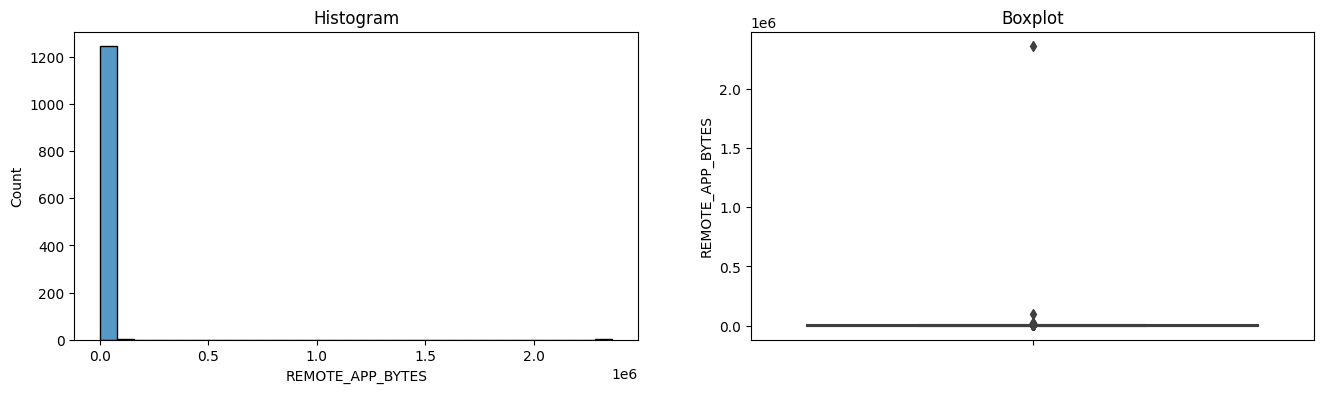


pay_amt_1 - After Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


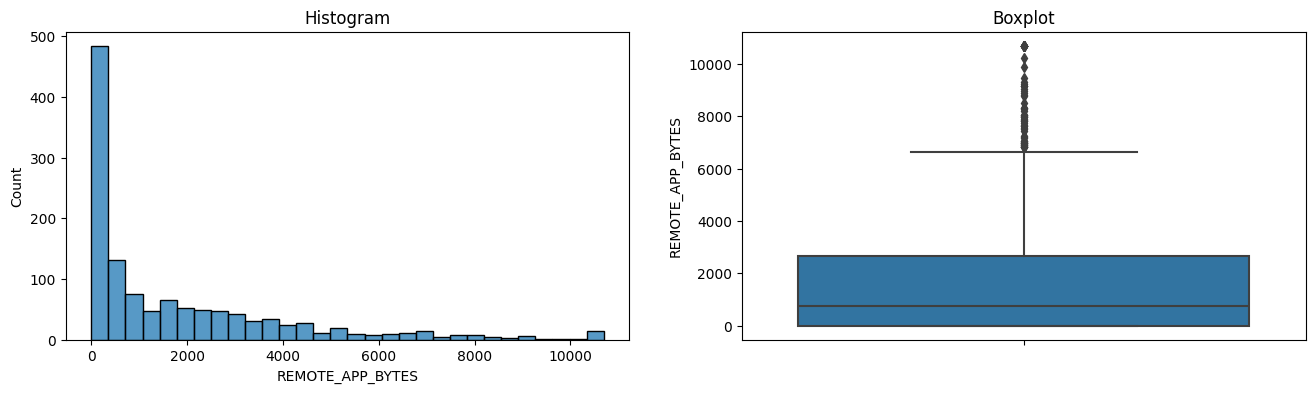

bill_amt_1 - Before Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


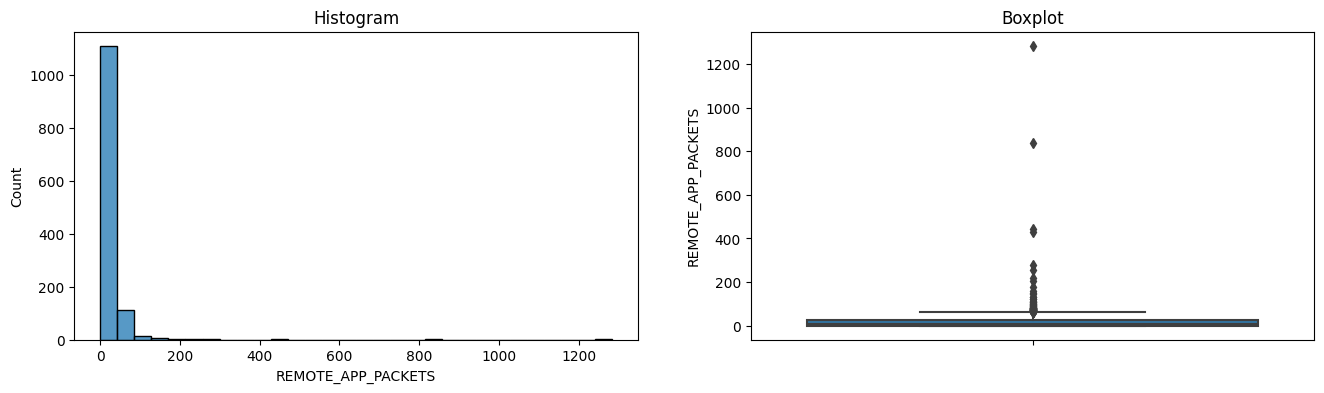


bill_amt_1 - After Capping


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


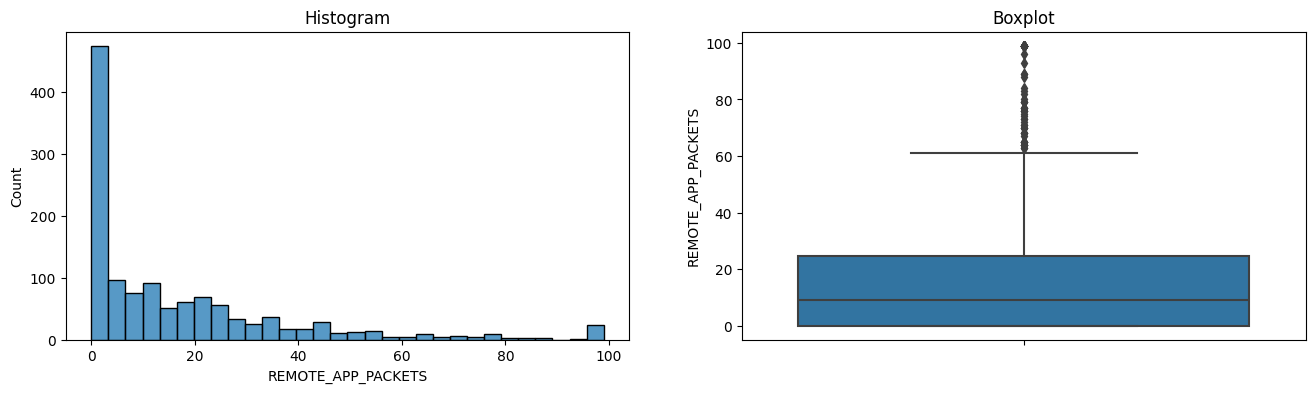

In [44]:
# Check the distribution before and after capping

print('pay_amt_1 - Before Capping')
diagnostic_plots(X_train, 'REMOTE_APP_BYTES')

print('\npay_amt_1 - After Capping')
diagnostic_plots(X_train_capped, 'REMOTE_APP_BYTES')

print('bill_amt_1 - Before Capping')
diagnostic_plots(X_train, 'REMOTE_APP_PACKETS')

print('\nbill_amt_1 - After Capping')
diagnostic_plots(X_train_capped, 'REMOTE_APP_PACKETS')

### Scaling & Encoding

Feature scaling <br>
StandardScaler: for data with normal distribution & for linear regression<br>
RobustScaler: for data with a lot of outliers


Feature encoding <br>
OneHotEncoder: for nominal categorical feature<br>
OrdinalEncoder: for ordinal categorical feature

In [45]:
# split X_train_capped categorical column 

# Create DataFrame with categorical columns
X_train_capped_categorical = X_train_capped[categorical_cols]
X_test_capped_categorical = X_test_capped[categorical_cols]

# concat type column to categorical column
X_train_capped_categorical = pd.concat([X_train_capped_categorical, X_train_capped['Type']], axis=1)
X_test_capped_categorical = pd.concat([X_test_capped_categorical, X_test_capped['Type']], axis=1)

# Create DataFrame with numerical columns
X_train_capped_numerical = X_train_capped.drop(columns=categorical_cols)
X_test_capped_numerical = X_test_capped.drop(columns=categorical_cols)

In [46]:
X_train_capped_categorical.head()

,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,Type
579,ISO-8859-1,Apache,AU,Queensland,0
651,ISO-8859-1,cloudflare-nginx,CA,Quebec,0
1629,UTF-8,Apache,ES,Barcelona,1
960,UTF-8,Apache,US,CA,0
527,UTF-8,Apache/2.2.23 (Amazon),US,New York,0


In [47]:
X_train_capped_numerical.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
579,41,9,2080.0,2006-03-22,2017-03-22,0,0,0,0,0,0,0,0,0,0.0,0
651,43,9,2080.0,2002-04-10,2016-06-09,20,4,7,1511,22,21,14430,1663,22,2.0,0
1629,100,20,2080.0,2008-09-17,2016-09-02,0,0,0,0,0,3,186,0,0,0.0,1
960,52,10,2080.0,1998-04-14,2017-04-14,0,0,0,0,0,0,0,0,0,0.0,0
527,40,8,9806.0,2005-09-26,2011-07-23,84,17,12,9302,103,99,38681,10693,103,6.0,0


#### Train data scaling & encoding

In [48]:
rc=RobustScaler()

In [49]:
X_train_capped_numerical.drop(columns=['Type'], inplace=True)
X_test_capped_numerical.drop(columns=['Type'], inplace=True)

X_train_capped_numerical.WHOIS_REGDATE = X_train_capped_numerical.WHOIS_REGDATE.view("int64")
X_train_capped_numerical.WHOIS_UPDATED_DATE = X_train_capped_numerical.WHOIS_UPDATED_DATE.view("int64")

X_test_capped_numerical.WHOIS_REGDATE = X_test_capped_numerical.WHOIS_REGDATE.view("int64")
X_test_capped_numerical.WHOIS_UPDATED_DATE = X_test_capped_numerical.WHOIS_UPDATED_DATE.view("int64")

X_train_scale_num = rc.fit_transform(X_train_capped_numerical)
X_test_scale_num = rc.transform(X_test_capped_numerical)

# Transform into DataFrame
X_train_scale_num = pd.DataFrame(X_train_scale_num, columns=X_train_capped_numerical.columns)
X_test_scale_num = pd.DataFrame(X_test_scale_num, columns=X_test_capped_numerical.columns)

In [50]:
X_train_scale_num

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,-0.266667,-0.2,0.000000,0.687506,0.552835,-0.380952,0.0,-0.4,-0.299290,-0.310680,-0.363636,-0.061943,-0.283550,-0.310680,0.0
1,-0.200000,-0.2,0.000000,0.142790,-0.184278,0.571429,0.8,1.0,0.350462,0.543689,0.484848,1.430263,0.338539,0.543689,0.5
2,1.700000,2.0,0.000000,1.031259,0.034794,-0.380952,0.0,-0.4,-0.299290,-0.310680,-0.242424,-0.042708,-0.283550,-0.310680,0.0
3,0.100000,0.0,0.000000,-0.407593,0.612113,-0.380952,0.0,-0.4,-0.299290,-0.310680,-0.363636,-0.061943,-0.283550,-0.310680,0.0
4,-0.300000,-0.4,3.722925,0.620644,-4.779639,3.619048,3.4,2.0,3.700710,3.689320,3.636364,3.938057,3.716450,3.689320,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,-0.033333,0.0,0.000000,0.732836,-3.256443,-0.380952,0.0,-0.4,-0.299290,-0.310680,-0.363636,-0.061943,-0.283550,-0.310680,0.0
1242,0.400000,-0.2,-0.996988,-0.074039,0.024485,-0.380952,0.0,-0.4,-0.299290,-0.310680,-0.363636,-0.061943,-0.283550,-0.310680,0.0
1243,1.733333,2.0,0.000000,0.757767,-0.926546,1.761905,4.0,0.4,1.730811,1.592233,2.626263,3.938057,1.590199,1.592233,1.0
1244,-0.266667,-0.2,0.000000,0.889602,0.052835,-0.380952,0.0,-0.4,-0.299290,-0.310680,-0.363636,-0.061943,-0.283550,-0.310680,0.0


In [51]:
X_test_scale_num

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,0.633333,0.8,0.000000,0.224762,-0.962629,2.095238,4.0,0.2,1.723070,1.864078,1.939394,3.938057,1.599177,1.864078,1.0
1,0.766667,0.4,-0.827370,0.864671,0.480670,0.952381,0.4,0.6,0.771447,0.932039,0.808081,1.899641,0.764612,0.932039,1.0
2,0.333333,0.4,0.000000,-0.279535,-4.181701,0.285714,0.0,0.2,0.319071,0.388350,0.282828,0.434425,0.365099,0.388350,1.0
3,0.100000,0.4,0.000000,-0.443479,0.354381,-0.380952,0.0,-0.4,-0.299290,-0.310680,-0.363636,-0.061943,-0.283550,-0.310680,0.0
4,2.766667,3.4,0.000000,1.031259,0.034794,-0.333333,0.2,-0.2,-0.260589,-0.271845,-0.202020,-0.025335,-0.249883,-0.271845,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,1.100000,1.4,0.000000,0.306733,-0.171392,-0.380952,0.0,-0.4,-0.299290,-0.310680,-0.282828,-0.049120,-0.283550,-0.310680,0.0
530,-0.166667,-0.2,-0.839417,0.000000,0.000000,0.047619,0.0,0.0,0.074823,0.116505,0.121212,0.545694,0.098008,0.116505,0.5
531,-0.266667,-0.4,0.000000,-0.721126,-0.274485,1.523810,2.4,0.8,1.024726,1.398058,1.777778,3.938057,0.972973,1.398058,1.0
532,1.600000,1.8,2.745693,0.000000,0.000000,0.523810,0.6,0.4,0.538379,0.582524,0.686869,1.198211,0.569344,0.582524,1.0


In [52]:
ohe = OneHotEncoder(sparse=True, handle_unknown='ignore')


def encode_and_create_dataframe_train(df, column):
    # Fit a separate OneHotEncoder for the column
    transformed_data = ohe.fit_transform(df[[column]])

    # Get feature names for the column
    feature_names = ohe.get_feature_names_out(input_features=[column])

    # Create a DataFrame for the column
    transformed_df = pd.DataFrame(transformed_data.toarray(), 
                                  index=df.index, 
                                  columns=feature_names)
    
    return transformed_df, ohe

from sklearn.preprocessing import OrdinalEncoder


oe = OrdinalEncoder()

def encode_and_create_dataframe_train_ordinal(df, column):
    # Fit and transform the data
    transformed_data = oe.fit_transform(df[[column]])

    # Create a DataFrame for the column
    transformed_df = pd.DataFrame(transformed_data, 
                                  index=df.index, 
                                  columns=[column])
    
    return transformed_df, oe

In [53]:
# check number of variety in categorical column
for col in categorical_cols:
    print(f'{col}: {len(X_train_capped_categorical[col].unique())} labels')



CHARSET: 8 labels
SERVER: 185 labels
WHOIS_COUNTRY: 46 labels
WHOIS_STATEPRO: 143 labels


Insight:
- Since there's too much variation in the Server, Whois_country, and Whois_statepro, we will take only top 10 columns in beign website first.

In [54]:
# Function to get top N categories for a specific type
def get_top_categories_by_type(df, column, type_value, n=10):
    return df[df['Type'] == type_value][column].value_counts().head(n).index

# Get top 10 categories for 'SERVER' column for Type 0
top_10_server_type_0 = get_top_categories_by_type(X_train_capped_categorical, 'SERVER', type_value=0, n=10)

# Get top 10 categories for 'WHOIS_COUNTRY' column for Type 0
top_10_whois_country_type_0 = get_top_categories_by_type(X_train_capped_categorical, 'WHOIS_COUNTRY', type_value=0, n=10)

# Get top 10 categories for 'WHOIS_STATEPRO' column for Type 0
top_10_whois_statepro_type_0 = get_top_categories_by_type(X_train_capped_categorical, 'WHOIS_STATEPRO', type_value=0, n=10)

# Get top 10 categories for 'SERVER' column for Type 1
top_10_server_type_1 = get_top_categories_by_type(X_train_capped_categorical, 'SERVER', type_value=1, n=10)

# Get top 10 categories for 'WHOIS_COUNTRY' column for Type 1
top_10_whois_country_type_1 = get_top_categories_by_type(X_train_capped_categorical, 'WHOIS_COUNTRY', type_value=1, n=10)

# Get top 10 categories for 'WHOIS_STATEPRO' column for Type 1
top_10_whois_statepro_type_1 = get_top_categories_by_type(X_train_capped_categorical, 'WHOIS_STATEPRO', type_value=1, n=10)

top_10_server_type_0 = pd.DataFrame(top_10_server_type_0)
top_10_server_type_1 = pd.DataFrame(top_10_server_type_1)

top_10_whois_country_type_0 = pd.DataFrame(top_10_whois_country_type_0)
top_10_whois_country_type_1 = pd.DataFrame(top_10_whois_country_type_1)

top_10_whois_statepro_type_0 = pd.DataFrame(top_10_whois_statepro_type_0)
top_10_whois_statepro_type_1 = pd.DataFrame(top_10_whois_statepro_type_1)

# concat top 10 from type 0 and 1
top_10_server = pd.concat([top_10_server_type_0, top_10_server_type_1])
top_10_whois_country = pd.concat([top_10_whois_country_type_0, top_10_whois_country_type_1])
top_10_whois_statepro = pd.concat([top_10_whois_statepro_type_0, top_10_whois_statepro_type_1])

# Display the results
# print("Top 10 SERVER categories for Type 0:", top_10_server_type_0)
# print("\nTop 10 WHOIS_COUNTRY categories for Type 0:", top_10_whois_country_type_0)
# print("\nTop 10 WHOIS_STATEPRO categories for Type 0:", top_10_whois_statepro_type_0)

# print("\nTop 10 SERVER categories for Type 1:", top_10_server_type_1)

In [55]:
# Filter categorical columns to be top 10 only
X_train_capped_categorical['SERVER'] = np.where((X_train_capped_categorical['SERVER'].isin(top_10_server['SERVER'])), X_train_capped_categorical['SERVER'], 'other')
X_train_capped_categorical['WHOIS_COUNTRY'] = np.where((X_train_capped_categorical['WHOIS_COUNTRY'].isin(top_10_whois_country['WHOIS_COUNTRY'])), X_train_capped_categorical['WHOIS_COUNTRY'], 'other')
X_train_capped_categorical['WHOIS_STATEPRO'] = np.where((X_train_capped_categorical['WHOIS_STATEPRO'].isin(top_10_whois_statepro['WHOIS_STATEPRO'])), X_train_capped_categorical['WHOIS_STATEPRO'], 'other')


In [56]:
# Display the value counts after labeling
print(X_train_capped_categorical['SERVER'].value_counts())

SERVER
other                                                                                        358
Apache                                                                                       283
nginx                                                                                        141
unknown                                                                                      126
cloudflare-nginx                                                                              74
Microsoft-HTTPAPI/2.0                                                                         67
Server                                                                                        35
Microsoft-IIS/7.5                                                                             33
nginx/1.12.0                                                                                  29
GSE                                                                                           29
YouTubeFrontEnd        

In [57]:
print(X_train_capped_categorical['WHOIS_COUNTRY'].value_counts())

WHOIS_COUNTRY
US                768
unknown           211
CA                 66
other              57
ES                 43
AU                 21
PA                 16
GB                 10
JP                  9
UK                  8
CN                  8
FR                  7
CZ                  7
[u'GB'; u'UK']      5
KR                  4
ru                  4
UY                  2
Name: count, dtype: int64


In [58]:
# move [u'GB'; u'UK'] to other on both train and test
X_train_capped_categorical['WHOIS_COUNTRY'] = X_train_capped_categorical['WHOIS_COUNTRY'].replace("[u'GB'; u'UK']", 'other')
X_test_capped_categorical['WHOIS_COUNTRY'] = X_test_capped_categorical['WHOIS_COUNTRY'].replace("[u'GB'; u'UK']", 'other')

In [59]:
print(X_train_capped_categorical['WHOIS_STATEPRO'].value_counts())

WHOIS_STATEPRO
other          353
CA             250
unknown        239
NY              55
FL              50
WA              46
Arizona         44
Barcelona       43
California      42
ON              32
UT              24
NV              20
PA              17
Utah             9
Washington       8
PRAHA            6
Krasnoyarsk      4
WC1N             4
Name: count, dtype: int64


In [60]:
# check number of variety in categorical column
for col in categorical_cols:
    print(f'{col}: {len(X_train_capped_categorical[col].unique())} labels')



CHARSET: 8 labels
SERVER: 17 labels
WHOIS_COUNTRY: 16 labels
WHOIS_STATEPRO: 18 labels


In [61]:
# print variation for each categorical column
for col in categorical_cols:
    print(f'{col}: {X_train_capped_categorical[col].unique()}')
    

CHARSET: ['ISO-8859-1' 'UTF-8' 'utf-8' 'us-ascii' 'iso-8859-1' 'unknown'
 'windows-1252' 'windows-1251']
SERVER: ['Apache' 'cloudflare-nginx' 'other' 'Server' 'GSE' 'nginx' 'unknown'
 'Microsoft-HTTPAPI/2.0' 'nginx/1.8.0' 'nginx/1.10.1' 'Microsoft-IIS/7.5'
 'YouTubeFrontEnd' 'Apache/2.2.22 (Debian)' 'nginx/1.12.0'
 'Microsoft-IIS/6.0'
 'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4'
 'Apache/2.2.14 (FreeBSD) mod_ssl/2.2.14 OpenSSL/0.9.8y DAV/2 PHP/5.2.12 with Suhosin-Patch']
WHOIS_COUNTRY: ['AU' 'CA' 'ES' 'US' 'other' 'unknown' 'PA' 'FR' 'KR' 'CZ' 'JP' 'ru' 'UK'
 'CN' 'GB' 'UY']
WHOIS_STATEPRO: ['other' 'Barcelona' 'CA' 'NV' 'Washington' 'unknown' 'Arizona' 'UT' 'NY'
 'ON' 'PA' 'FL' 'California' 'PRAHA' 'WA' 'Krasnoyarsk' 'Utah' 'WC1N']


In [62]:
# Use the function for each column (train)
X_train_capped_CHARSET, ohe_CHARSET = encode_and_create_dataframe_train(X_train_capped_categorical, 'CHARSET')
X_test_transformed_CHARSET= ohe_CHARSET.transform(X_test_capped_categorical[['CHARSET']])

X_train_capped_SERVER, ohe_SERVER = encode_and_create_dataframe_train(X_train_capped_categorical, 'SERVER')
X_test_transformed_SERVER = ohe_SERVER.transform(X_test_capped_categorical[['SERVER']])

X_train_capped_WHOIS_STATEPRO, ohe_WHOIS_STATEPRO = encode_and_create_dataframe_train(X_train_capped_categorical, 'WHOIS_STATEPRO')
X_test_transformed_WHOIS_STATEPRO= ohe_WHOIS_STATEPRO.transform(X_test_capped_categorical[['WHOIS_STATEPRO']])

X_train_capped_WHOIS_COUNTRY, ohe_WHOIS_COUNTRY = encode_and_create_dataframe_train(X_train_capped_categorical, 'WHOIS_COUNTRY')
X_test_transformed_WHOIS_COUNTRY = ohe_WHOIS_COUNTRY.transform(X_test_capped_categorical[['WHOIS_COUNTRY']])

# X_train_capped_education_level, oe_destination = encode_and_create_dataframe_train_ordinal(X_train_capped_categorical, 'education_level')
# X_test_transformed_education_level = oe_destination.transform(X_test_capped_categorical[['education_level']])

C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and 

In [63]:
# reset index for both X_train_scale_num 
X_train_scale_num.reset_index(drop=True, inplace=True)
X_train_capped_CHARSET.reset_index(drop=True, inplace=True)
X_train_capped_SERVER.reset_index(drop=True, inplace=True)
X_train_capped_WHOIS_COUNTRY.reset_index(drop=True, inplace=True)
X_train_capped_WHOIS_STATEPRO.reset_index(drop=True, inplace=True)

# concat into X_train_capped
X_train_capped_fix = pd.concat([X_train_scale_num, X_train_capped_CHARSET], axis=1)
X_train_capped_fix = pd.concat([X_train_capped_fix, X_train_capped_SERVER], axis=1)
X_train_capped_fix = pd.concat([X_train_capped_fix, X_train_capped_WHOIS_COUNTRY], axis=1)
X_train_capped_fix = pd.concat([X_train_capped_fix, X_train_capped_WHOIS_STATEPRO], axis=1)

X_train_capped_fix

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,...,WHOIS_STATEPRO_ON,WHOIS_STATEPRO_PA,WHOIS_STATEPRO_PRAHA,WHOIS_STATEPRO_UT,WHOIS_STATEPRO_Utah,WHOIS_STATEPRO_WA,WHOIS_STATEPRO_WC1N,WHOIS_STATEPRO_Washington,WHOIS_STATEPRO_other,WHOIS_STATEPRO_unknown
0,-0.266667,-0.2,0.000000,0.687506,0.552835,-0.380952,0.0,-0.4,-0.299290,-0.310680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.200000,-0.2,0.000000,0.142790,-0.184278,0.571429,0.8,1.0,0.350462,0.543689,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.700000,2.0,0.000000,1.031259,0.034794,-0.380952,0.0,-0.4,-0.299290,-0.310680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.100000,0.0,0.000000,-0.407593,0.612113,-0.380952,0.0,-0.4,-0.299290,-0.310680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.300000,-0.4,3.722925,0.620644,-4.779639,3.619048,3.4,2.0,3.700710,3.689320,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,-0.033333,0.0,0.000000,0.732836,-3.256443,-0.380952,0.0,-0.4,-0.299290,-0.310680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1242,0.400000,-0.2,-0.996988,-0.074039,0.024485,-0.380952,0.0,-0.4,-0.299290,-0.310680,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1243,1.733333,2.0,0.000000,0.757767,-0.926546,1.761905,4.0,0.4,1.730811,1.592233,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1244,-0.266667,-0.2,0.000000,0.889602,0.052835,-0.380952,0.0,-0.4,-0.299290,-0.310680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [64]:
X_test_scale_num

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,0.633333,0.8,0.000000,0.224762,-0.962629,2.095238,4.0,0.2,1.723070,1.864078,1.939394,3.938057,1.599177,1.864078,1.0
1,0.766667,0.4,-0.827370,0.864671,0.480670,0.952381,0.4,0.6,0.771447,0.932039,0.808081,1.899641,0.764612,0.932039,1.0
2,0.333333,0.4,0.000000,-0.279535,-4.181701,0.285714,0.0,0.2,0.319071,0.388350,0.282828,0.434425,0.365099,0.388350,1.0
3,0.100000,0.4,0.000000,-0.443479,0.354381,-0.380952,0.0,-0.4,-0.299290,-0.310680,-0.363636,-0.061943,-0.283550,-0.310680,0.0
4,2.766667,3.4,0.000000,1.031259,0.034794,-0.333333,0.2,-0.2,-0.260589,-0.271845,-0.202020,-0.025335,-0.249883,-0.271845,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,1.100000,1.4,0.000000,0.306733,-0.171392,-0.380952,0.0,-0.4,-0.299290,-0.310680,-0.282828,-0.049120,-0.283550,-0.310680,0.0
530,-0.166667,-0.2,-0.839417,0.000000,0.000000,0.047619,0.0,0.0,0.074823,0.116505,0.121212,0.545694,0.098008,0.116505,0.5
531,-0.266667,-0.4,0.000000,-0.721126,-0.274485,1.523810,2.4,0.8,1.024726,1.398058,1.777778,3.938057,0.972973,1.398058,1.0
532,1.600000,1.8,2.745693,0.000000,0.000000,0.523810,0.6,0.4,0.538379,0.582524,0.686869,1.198211,0.569344,0.582524,1.0


In [65]:
# # make X_test_transformed_CHARSET into dataframe
X_test_transformed_CHARSET = pd.DataFrame.sparse.from_spmatrix(X_test_transformed_CHARSET)
X_test_transformed_SERVER = pd.DataFrame.sparse.from_spmatrix(X_test_transformed_SERVER)
X_test_transformed_WHOIS_COUNTRY = pd.DataFrame.sparse.from_spmatrix(X_test_transformed_WHOIS_COUNTRY)
X_test_transformed_WHOIS_STATEPRO = pd.DataFrame.sparse.from_spmatrix(X_test_transformed_WHOIS_STATEPRO)

# set column according to train set
X_test_transformed_CHARSET.columns = X_train_capped_CHARSET.columns
X_test_transformed_SERVER.columns = X_train_capped_SERVER.columns
X_test_transformed_WHOIS_COUNTRY.columns = X_train_capped_WHOIS_COUNTRY.columns
X_test_transformed_WHOIS_STATEPRO.columns = X_train_capped_WHOIS_STATEPRO.columns

# reset index
X_test_scale_num.reset_index(drop=True, inplace=True)
X_test_transformed_CHARSET.reset_index(drop=True, inplace=True)
X_test_transformed_SERVER.reset_index(drop=True, inplace=True)
X_test_transformed_WHOIS_COUNTRY.reset_index(drop=True, inplace=True)
X_test_transformed_WHOIS_STATEPRO.reset_index(drop=True, inplace=True)

# concat into X_train_capped
X_test_capped_tester = pd.concat([X_test_scale_num, X_test_transformed_CHARSET], axis=1)
X_test_capped_tester = pd.concat([X_test_capped_tester, X_test_transformed_SERVER], axis=1)
X_test_capped_tester = pd.concat([X_test_capped_tester, X_test_transformed_WHOIS_COUNTRY], axis=1)
X_test_capped_tester = pd.concat([X_test_capped_tester, X_test_transformed_WHOIS_STATEPRO], axis=1)



In [66]:
X_test_capped_tester

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,...,WHOIS_STATEPRO_ON,WHOIS_STATEPRO_PA,WHOIS_STATEPRO_PRAHA,WHOIS_STATEPRO_UT,WHOIS_STATEPRO_Utah,WHOIS_STATEPRO_WA,WHOIS_STATEPRO_WC1N,WHOIS_STATEPRO_Washington,WHOIS_STATEPRO_other,WHOIS_STATEPRO_unknown
0,0.633333,0.8,0.000000,0.224762,-0.962629,2.095238,4.0,0.2,1.723070,1.864078,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.766667,0.4,-0.827370,0.864671,0.480670,0.952381,0.4,0.6,0.771447,0.932039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.333333,0.4,0.000000,-0.279535,-4.181701,0.285714,0.0,0.2,0.319071,0.388350,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.100000,0.4,0.000000,-0.443479,0.354381,-0.380952,0.0,-0.4,-0.299290,-0.310680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.766667,3.4,0.000000,1.031259,0.034794,-0.333333,0.2,-0.2,-0.260589,-0.271845,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,1.100000,1.4,0.000000,0.306733,-0.171392,-0.380952,0.0,-0.4,-0.299290,-0.310680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
530,-0.166667,-0.2,-0.839417,0.000000,0.000000,0.047619,0.0,0.0,0.074823,0.116505,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
531,-0.266667,-0.4,0.000000,-0.721126,-0.274485,1.523810,2.4,0.8,1.024726,1.398058,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
532,1.600000,1.8,2.745693,0.000000,0.000000,0.523810,0.6,0.4,0.538379,0.582524,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [67]:
# reorder columns to be same as X_train_capped_fix
X_test_capped_tester = X_test_capped_tester[X_train_capped_fix.columns]

X_test_capped_tester


,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,...,WHOIS_STATEPRO_ON,WHOIS_STATEPRO_PA,WHOIS_STATEPRO_PRAHA,WHOIS_STATEPRO_UT,WHOIS_STATEPRO_Utah,WHOIS_STATEPRO_WA,WHOIS_STATEPRO_WC1N,WHOIS_STATEPRO_Washington,WHOIS_STATEPRO_other,WHOIS_STATEPRO_unknown
0,0.633333,0.8,0.000000,0.224762,-0.962629,2.095238,4.0,0.2,1.723070,1.864078,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.766667,0.4,-0.827370,0.864671,0.480670,0.952381,0.4,0.6,0.771447,0.932039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.333333,0.4,0.000000,-0.279535,-4.181701,0.285714,0.0,0.2,0.319071,0.388350,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.100000,0.4,0.000000,-0.443479,0.354381,-0.380952,0.0,-0.4,-0.299290,-0.310680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.766667,3.4,0.000000,1.031259,0.034794,-0.333333,0.2,-0.2,-0.260589,-0.271845,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,1.100000,1.4,0.000000,0.306733,-0.171392,-0.380952,0.0,-0.4,-0.299290,-0.310680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
530,-0.166667,-0.2,-0.839417,0.000000,0.000000,0.047619,0.0,0.0,0.074823,0.116505,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
531,-0.266667,-0.4,0.000000,-0.721126,-0.274485,1.523810,2.4,0.8,1.024726,1.398058,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
532,1.600000,1.8,2.745693,0.000000,0.000000,0.523810,0.6,0.4,0.538379,0.582524,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [68]:
# # test several column only
# X_train_capped_fix = X_train_capped_fix[['education_level', 'age', 'pay_0', 'bill_amt_1', 'sex_1', 'sex_2', 'martial_status_1', 'martial_status_2', 'martial_status_3']]

# X_test_capped_tester = X_test_capped_tester[['education_level', 'age', 'pay_0', 'bill_amt_1', 'sex_1', 'sex_2', 'martial_status_1', 'martial_status_2', 'martial_status_3']]

In [69]:
X_train_capped_fix
X_test_capped_tester

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,...,WHOIS_STATEPRO_ON,WHOIS_STATEPRO_PA,WHOIS_STATEPRO_PRAHA,WHOIS_STATEPRO_UT,WHOIS_STATEPRO_Utah,WHOIS_STATEPRO_WA,WHOIS_STATEPRO_WC1N,WHOIS_STATEPRO_Washington,WHOIS_STATEPRO_other,WHOIS_STATEPRO_unknown
0,0.633333,0.8,0.000000,0.224762,-0.962629,2.095238,4.0,0.2,1.723070,1.864078,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.766667,0.4,-0.827370,0.864671,0.480670,0.952381,0.4,0.6,0.771447,0.932039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.333333,0.4,0.000000,-0.279535,-4.181701,0.285714,0.0,0.2,0.319071,0.388350,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.100000,0.4,0.000000,-0.443479,0.354381,-0.380952,0.0,-0.4,-0.299290,-0.310680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.766667,3.4,0.000000,1.031259,0.034794,-0.333333,0.2,-0.2,-0.260589,-0.271845,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,1.100000,1.4,0.000000,0.306733,-0.171392,-0.380952,0.0,-0.4,-0.299290,-0.310680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
530,-0.166667,-0.2,-0.839417,0.000000,0.000000,0.047619,0.0,0.0,0.074823,0.116505,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
531,-0.266667,-0.4,0.000000,-0.721126,-0.274485,1.523810,2.4,0.8,1.024726,1.398058,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
532,1.600000,1.8,2.745693,0.000000,0.000000,0.523810,0.6,0.4,0.538379,0.582524,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [70]:
# from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif

# # select top 2 features using mutual_info_classif
# selector = SelectKBest(mutual_info_classif, k=2)
# X_new = selector.fit_transform(X, y)
# print(X_new)

## Model Definition
   > Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

Insight:
- There are several model that we will use to Detect malicious website based on the dataset:
    - Logistic Regression
    - K-Nearest Neighbors
    - Decision Tree
    - Random Forest
    - Support Vector Machine
    - XGBoost
    - AdaBoost
- We will use GridSearchCV and RandomizedSearchCV to find the best hyperparameter for the models.
- For evaluation metrics, we will use accuracy, precision, recall, and f1 score with evaluation_metrics function.

Hyperparameter Insight:
- Logistic Regression
    - C: Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
    - penalty: Used to specify the norm used in the penalization.
    - max_iter: Maximum number of iterations taken for the solvers to converge.
    - random_state: The seed of the pseudo random number generator to use when shuffling the data.
- KNN
    - n_neighbors: Number of neighbors to use for the model training.
- SVM
    - C: Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.
    - kernel: Specifies the kernel type to be used in the algorithm.
    - gamma: Kernel coefficient.
- Decision Tree
    - max_depth: The maximum depth of the tree.
- Random Forest
    - n_estimators: The number of trees in the forest.
    - max_depth: The maximum depth of the tree.
- XGBoost
    - n_estimators: Number of gradient boosted trees. Equivalent to number of boosting rounds.
    - max_depth: Maximum tree depth for base learners.
    - learning_rate: Boosting learning rate.
    - subsample: Subsample ratio of the training instance.
    - colsample_bytree: Subsample ratio of columns when constructing each tree.
    - gamma: Minimum loss reduction required to make a further partition on a leaf node of the tree.
- AdaBoost
    - n_estimators: The maximum number of estimators at which boosting is terminated.
    - learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate.
    - algorithm: If ‘SAMME.R’ then use the SAMME.R real boosting algorithm. base_estimator must support calculation of class probabilities. If ‘SAMME’ then use the SAMME discrete boosting algorithm.

## Model Training (Logistic Regression)
   > Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [71]:
# Define Hyperparameters
random_state = [int(x) for x in np.linspace(10, 1000, 10)]
max_iter = [int(x) for x in np.linspace(100, 1000, 10)]
penalty = ['l2', None]
# solver = ['newton-cg', 'lbfgs', 'liblinear']
C = [100, 10, 1.0, 0.1, 0.01]

log_reg_params = {'C': C,
                    'penalty':penalty,
                    'max_iter':max_iter,
                    'random_state':random_state,
                    # 'solver':solver
                    }
log_reg_params

{'C': [100, 10, 1.0, 0.1, 0.01],
 'penalty': ['l2', None],
 'max_iter': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'random_state': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000]}

In [72]:
# Train with Random Search
# %%time

rf_randomcv = RandomizedSearchCV(estimator=LogisticRegression(),
                                 param_distributions=log_reg_params,
                                 n_iter=50,
                                 cv=5,
                                 random_state=46,
                                 n_jobs=-1,
                                 scoring='f1')
rf_randomcv.fit(X_train_capped_fix, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'max_iter': [100, 200, 300, 400, 500,
                                                     600, 700, 800, 900, 1000],
                                        'penalty': ['l2', None],
                                        'random_state': [10, 120, 230, 340, 450,
                                                         560, 670, 780, 890,
                                                         1000]},
                   random_state=46, scoring='f1')

In [73]:
# Get Best Hyperparameters

rf_randomcv.best_params_

{'random_state': 890, 'penalty': 'l2', 'max_iter': 800, 'C': 10}

In [74]:
log_model = LogisticRegression(penalty='l2', C=1.0, random_state=0, max_iter=1000)

# {'random_state': 560, 'penalty': 'l2', 'max_iter': 400, 'C': 100}
log_model_rcv = LogisticRegression(penalty=None, C=100, random_state=560, max_iter=400)


In [75]:
log_model.fit(X_train_capped_fix, y_train)   
log_model_rcv.fit(X_train_capped_fix, y_train)   

C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100, max_iter=400, penalty=None, random_state=560)

In [76]:
y_pred_train = log_model.predict(X_train_capped_fix)
y_pred_test = log_model.predict(X_test_capped_tester)

y_pred_train_rcv = log_model_rcv.predict(X_train_capped_fix)
y_pred_test_rcv = log_model_rcv.predict(X_test_capped_tester)

score_log_reg = cross_val_score(log_model, X_train_capped_fix, y_train, cv=15, scoring='f1')
score_log_reg

C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


array([0.8       , 0.94736842, 0.625     , 0.82352941, 0.66666667,
       0.85714286, 0.86956522, 0.77777778, 0.77777778, 0.95238095,
       0.625     , 0.88      , 0.63157895, 0.84210526, 0.83333333])

## Model Evaluation (Logistic Regression)
   > Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. **Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya**.

In [77]:
print('accuracy score train : ',accuracy_score(y_train,y_pred_train))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test))

print('accuracy score train : ',accuracy_score(y_train,y_pred_train_rcv))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_rcv))

accuracy score train :  0.9630818619582665
accuracy score test :  0.9456928838951311
accuracy score train :  0.9727126805778491
accuracy score test :  0.8801498127340824


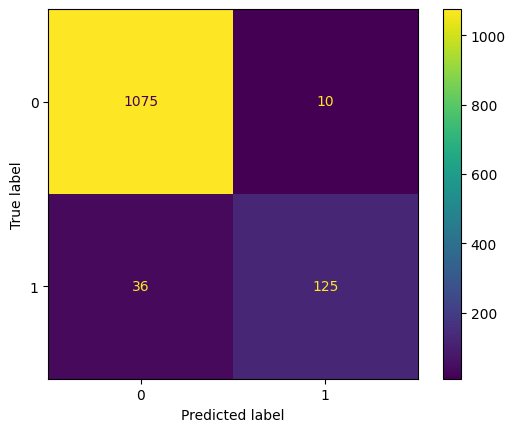

In [78]:
cm = confusion_matrix(y_train, y_pred_train, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)

disp.plot()
plt.show()

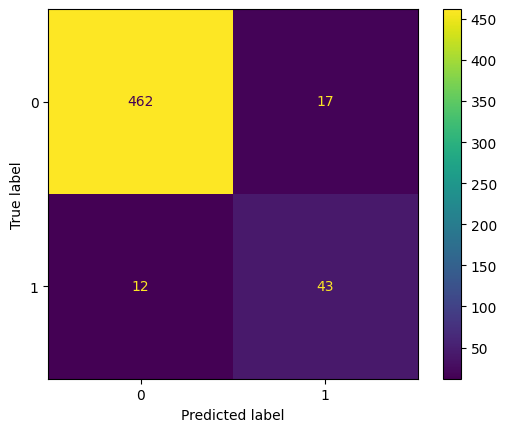

In [79]:
cm = confusion_matrix(y_test, y_pred_test, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log_model.classes_)

disp.plot()
plt.show()

In [80]:
print(classification_report(y_train,y_pred_train))
print(confusion_matrix(y_train,y_pred_train))

print(classification_report(y_test,y_pred_test))
print(confusion_matrix(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1085
           1       0.93      0.78      0.84       161

    accuracy                           0.96      1246
   macro avg       0.95      0.88      0.91      1246
weighted avg       0.96      0.96      0.96      1246

[[1075   10]
 [  36  125]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       479
           1       0.72      0.78      0.75        55

    accuracy                           0.95       534
   macro avg       0.85      0.87      0.86       534
weighted avg       0.95      0.95      0.95       534

[[462  17]
 [ 12  43]]


In [81]:
print(classification_report(y_train, y_pred_train_rcv))
print(confusion_matrix(y_train, y_pred_train_rcv))

print(classification_report(y_test,y_pred_test_rcv))
print(confusion_matrix(y_test,y_pred_test_rcv))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1085
           1       0.93      0.85      0.89       161

    accuracy                           0.97      1246
   macro avg       0.96      0.92      0.94      1246
weighted avg       0.97      0.97      0.97      1246

[[1075   10]
 [  24  137]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       479
           1       0.46      0.87      0.60        55

    accuracy                           0.88       534
   macro avg       0.72      0.88      0.76       534
weighted avg       0.93      0.88      0.90       534

[[422  57]
 [  7  48]]


In [82]:
log_model.coef_

array([[-2.47412910e+00,  2.68761586e+00, -2.77662436e-01,
         7.40908914e-01,  2.96936974e-01,  1.69907287e-01,
        -1.43897247e+00,  1.57178339e-01,  1.07173035e-01,
         5.40788426e-04,  1.28387214e-01, -3.88567847e-01,
         8.70754124e-02,  5.40788426e-04,  1.29301295e+00,
         4.51101898e-01, -5.59945299e-02, -3.51615674e-01,
         2.51610325e-01, -7.83833374e-01, -3.04685823e-01,
         8.49982743e-01, -5.86102190e-02, -4.95486444e-01,
         8.77527804e-01,  1.46929075e+00,  3.97035093e-01,
        -3.14320253e-01, -9.76987947e-03,  2.17699516e+00,
        -1.39350370e+00, -5.71712096e-01, -4.20776512e-01,
        -1.01193749e+00, -6.69890921e-02,  9.80012368e-01,
         4.56886510e-01,  4.35144393e-01, -8.96224600e-01,
        -1.61421667e+00, -1.05595077e+00, -1.09733098e+00,
         3.62550739e-03,  4.77722672e-01,  2.10394967e+00,
        -1.08447041e-01,  1.56804161e-01, -8.94304255e-01,
         5.27512414e-01,  1.55471399e-01,  1.29278518e-0

In [83]:
log_model.intercept_

array([-0.7268034])

In [84]:
# y_pred_new_proba = log_model.predict_proba(scaled_X_test)
# y_pred_new_proba

## Model Training (KNN)
   > Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [85]:
train_score = {}
test_score = {}
n_neighbors = np.arange(2, 30, 1)
for neighbor in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train_capped_fix, y_train)
    train_score[neighbor]=knn.score(X_train_capped_fix, y_train)
    test_score[neighbor]=knn.score(X_test_capped_tester, y_test)
    # y_pred_train_knn[neighbor] = knn.predict(X_train_capped_fix)
    # y_pred_test_knn[neighbor]= knn.predict(X_test_capped_tester)

C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Py

In [86]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)
parameter={'n_neighbors': np.arange(2, 30, 1)}
knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn, param_grid=parameter, cv=kf, verbose=1)
knn_cv.fit(X_train_capped_fix, y_train)
print(knn_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'n_neighbors': 2}


In [87]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_capped_fix, y_train)

KNeighborsClassifier(n_neighbors=2)

In [88]:
# Model Prediction

y_pred_train_knn = knn.predict(X_train_capped_fix)
y_pred_test_knn = knn.predict(X_test_capped_tester)

score_knn = cross_val_score(knn, X_train_capped_fix, y_train, cv=5, scoring='f1')
score_knn

C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


array([0.77777778, 0.81481481, 0.69230769, 0.77777778, 0.77192982])

## Model Evaluation (KNN)

In [89]:
# Model Evaluation - Train Set & Test Set

print(classification_report(y_train, y_pred_train_knn))
print(confusion_matrix(y_train, y_pred_train_knn))

print(classification_report(y_test, y_pred_test_knn))
print(confusion_matrix(y_test, y_pred_test_knn))



              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1085
           1       1.00      0.75      0.86       161

    accuracy                           0.97      1246
   macro avg       0.98      0.88      0.92      1246
weighted avg       0.97      0.97      0.97      1246

[[1085    0]
 [  40  121]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       479
           1       0.84      0.84      0.84        55

    accuracy                           0.97       534
   macro avg       0.91      0.91      0.91       534
weighted avg       0.97      0.97      0.97       534

[[470   9]
 [  9  46]]


## Model Training (SVM)
   > Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [90]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.01, 0.1, 0.001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), 
                    param_grid, 
                    cv=5,
                    n_jobs=-1,
                    verbose=2,
                    scoring='f1') 
  
# fitting the model for grid search 9
grid.fit(X_train_capped_fix, y_train) 
score_svm = cross_val_score(grid, X_train_capped_fix, y_train, cv=5, scoring='f1')
score_svm

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


array([0.89230769, 0.86206897, 0.78571429, 0.88135593, 0.875     ])

Insight:
- linear & poly kernel takes too long to train with the amount of data dimension we have. So, we will use rbf kernel.

In [91]:
grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [92]:
svm_scaled = SVC(C=100, gamma=0.01, kernel='rbf')
svm_scaled.fit(X_train_capped_fix, y_train)


SVC(C=100, gamma=0.01)

## Model Evaluation (SVM)
   > Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. **Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya**.

In [93]:
def performance_check(clf, X, y):
  y_pred = clf.predict(X)
  print(classification_report(y, y_pred))
  print(confusion_matrix(y, y_pred))

In [94]:
# Model Evaluation
print('Train : ', performance_check(svm_scaled, X_train_capped_fix, y_train))
print('Test  : ', performance_check(svm_scaled, X_test_capped_tester, y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1085
           1       0.98      0.93      0.95       161

    accuracy                           0.99      1246
   macro avg       0.98      0.96      0.97      1246
weighted avg       0.99      0.99      0.99      1246

[[1082    3]
 [  12  149]]
Train :  None
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       479
           1       0.71      0.89      0.79        55

    accuracy                           0.95       534
   macro avg       0.85      0.92      0.88       534
weighted avg       0.96      0.95      0.95       534

[[459  20]
 [  6  49]]
Test  :  None


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


## Model Training (Decision Tree)
   > Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [95]:
# Training using Decision Tree
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=6, random_state=10)
model_dt.fit(X_train_capped_fix, y_train)


DecisionTreeClassifier(max_depth=6, random_state=10)

In [96]:
y_pred_train_dt = model_dt.predict(X_train_capped_fix)
y_pred_test_dt = model_dt.predict(X_test_capped_tester)

C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [97]:
score_decision_tree = cross_val_score(model_dt, X_train_capped_fix, y_train, cv=5, scoring='f1')
score_decision_tree

array([0.73529412, 0.73015873, 0.65671642, 0.70175439, 0.76190476])

## Model Evaluation (Decision Tree)
   > Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. **Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya**.

In [98]:
classes = np.unique(y_train)
classes = np.unique(y_train).astype(str)

Decision Tree - Train


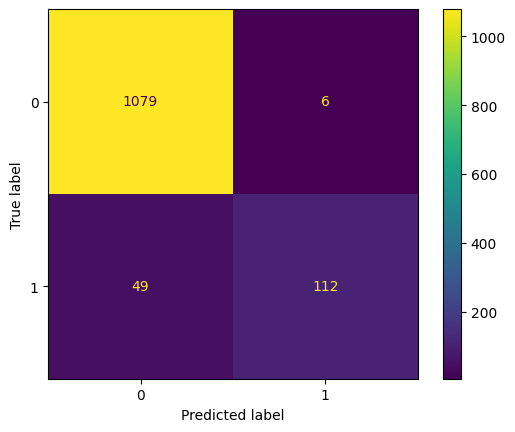

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1085
           1       0.95      0.70      0.80       161

    accuracy                           0.96      1246
   macro avg       0.95      0.85      0.89      1246
weighted avg       0.96      0.96      0.95      1246


Decision Tree - Test


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


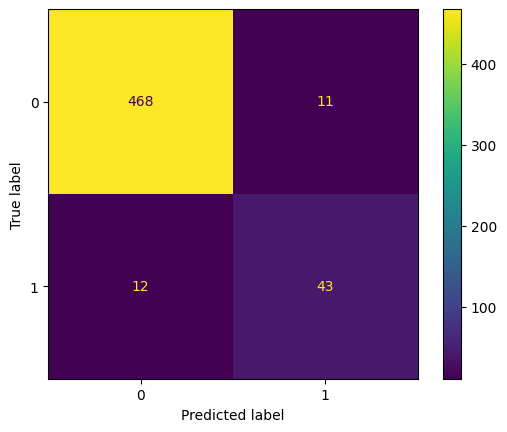

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       479
           1       0.80      0.78      0.79        55

    accuracy                           0.96       534
   macro avg       0.89      0.88      0.88       534
weighted avg       0.96      0.96      0.96       534



In [99]:
# Model Evaluation

def performance_check(clf, X, y, classes):
  y_pred = clf.predict(X)
  cm = confusion_matrix(y, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
  disp.plot()
  plt.show()
  print(classification_report(y, y_pred, target_names=classes))

print('Decision Tree - Train')
performance_check(model_dt, X_train_capped_fix, y_train, classes)
print('')

print('Decision Tree - Test')
performance_check(model_dt, X_test_capped_tester, y_test, classes)

## Model Training (Random Forest)
   > Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [100]:
param_grid = {'n_estimators': [10, 25, 50, 75, 100],  
              'max_depth': [5, 7, 10, 15]}  
  
grid_linear = GridSearchCV(RandomForestClassifier(), 
                    param_grid, 
                    cv=2,
                    n_jobs=-1,
                    verbose=2,
                    scoring='f1') 
  
# fitting the model for grid search 9
grid_linear.fit(X_train_capped_fix, y_train) 

Fitting 2 folds for each of 20 candidates, totalling 40 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 10, 15],
                         'n_estimators': [10, 25, 50, 75, 100]},
             scoring='f1', verbose=2)

In [101]:
grid_linear.best_params_

{'max_depth': 15, 'n_estimators': 50}

In [102]:
rnd_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42)

rnd_clf.fit(X_train_capped_fix, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [103]:
score_rnd_for = cross_val_score(rnd_clf, X_train_capped_fix, y_train, cv=5, scoring='roc_auc')
score_rnd_for


array([0.99678816, 0.98631912, 0.96356567, 0.97379032, 0.97364631])

## Model Evaluation (Random Forest)
   > Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. **Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya**.

In [104]:
# Model Evaluation

y_train_pred_rnd = rnd_clf.predict(X_train_capped_fix)
y_test_pred_rnd = rnd_clf.predict(X_test_capped_tester)

print(classification_report(y_train, y_train_pred_rnd))
print(confusion_matrix(y_train, y_train_pred_rnd))
print(classification_report(y_test, y_test_pred_rnd))
print(confusion_matrix(y_test, y_test_pred_rnd))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1085
           1       1.00      0.91      0.95       161

    accuracy                           0.99      1246
   macro avg       0.99      0.96      0.97      1246
weighted avg       0.99      0.99      0.99      1246

[[1085    0]
 [  14  147]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       479
           1       1.00      0.80      0.89        55

    accuracy                           0.98       534
   macro avg       0.99      0.90      0.94       534
weighted avg       0.98      0.98      0.98       534

[[479   0]
 [ 11  44]]


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


## Model Training (AdaBoost & XGBoost)
   > Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

#### AdaBoost

In [105]:
# Model Training - Random Forest - Using KNN as Base Model
from sklearn.ensemble import AdaBoostClassifier

ada_svm = AdaBoostClassifier(
    SVC(C=100, gamma=0.01, kernel='rbf', random_state=42),
    n_estimators=200,
    algorithm="SAMME",
    learning_rate=0.5,
    random_state=42)

ada_svm.fit(X_train_capped_fix, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=SVC(C=100, gamma=0.01, random_state=42),
                   learning_rate=0.5, n_estimators=200, random_state=42)

In [106]:
y_pred_train_ada = ada_svm.predict(X_train_capped_fix)
y_pred_test_ada = ada_svm.predict(X_test_capped_tester)

C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [107]:
score_ada = cross_val_score(ada_svm, X_train_capped_fix, y_train, cv=3, scoring='f1')
score_ada

array([0.69473684, 0.77419355, 0.64864865])

#### XGBoost

In [108]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

#### Trying Pipeline with XGBoost since we get the highest score with XGBoost

In [109]:
# Creating an object with the column labels of only the categorical features and one with only the numeric features:
categorical_features = X_train_capped_fix.select_dtypes(exclude="number").columns.tolist()
numeric_features = X_train_capped_fix.select_dtypes(include="number").columns.tolist()

# Create the categorical pipeline, for the categorical variables Meta imputes the missing values with a constant value and we encode them with One-Hot encoding:
categorical_pipeline = Pipeline(
    steps=[
        ("impute", SimpleImputer(strategy= 'constant', fill_value= 'unknown')), 
        ("one-hot", OneHotEncoder(handle_unknown="ignore", sparse=False)) 
    ]
)
# Create the numeric pipeline, for the numeric variables Meta imputes the missings with the mean of the column and standardize them, so that the features have a mean of 0 and a variance of 1: 
numeric_pipeline = Pipeline(
    steps=[("impute", SimpleImputer(strategy="mean")), 
           ("scale", StandardScaler())]
)
# Combining the two pipelines with a column transformer:
full_processor = ColumnTransformer(transformers=[
        ("numeric", numeric_pipeline, numeric_features),
        ("categorical", categorical_pipeline, categorical_features),
    ]
)

In [110]:
xgb_cl = xgb.XGBClassifier(eval_metric='logloss', seed=7)
 
# Create XGBoost pipeline:
xgb_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', xgb_cl)
])

# Evaluate the model with the use of cv:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
scores_xgb = cross_val_score(xgb_pipeline, X_train_capped_fix, y_train, cv=cv, scoring = 'roc_auc')
print("mean = ", scores_xgb.mean())
print("std = ",  scores_xgb.std())

mean =  0.9816296606619186
std =  0.010854510702914455


In [111]:
# Fit Meta's default XGBoost pipeline:
xgb_pipeline.fit(X_train_capped_fix, y_train)

xgb_pipeline_train_pred = xgb_pipeline.predict(X_train_capped_fix)
xgb_pipeline_test_pred = xgb_pipeline.predict(X_test_capped_tester)

C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [112]:
invalid_columns = [col for col in X_train_capped_fix.columns if not isinstance(col, str) or any(char in col for char in ['[', ']', '<'])]
print(invalid_columns)

# handle "WHOIS_COUNTRY with value [u'GB'; u'UK'] to be moved to other 

[]


In [113]:
xgb_model = xgb.XGBClassifier()

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.1), # default 0.1 
    "max_depth": randint(2, 3), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

recall_scorer = make_scorer(recall_score)

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=20, cv=5, verbose=1, n_jobs=1, return_train_score=True, scoring=recall_scorer)

search.fit(X_train_capped_fix, y_train)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


Model with rank: 1
Mean validation score: 0.789 (std: 0.036)
Parameters: {'colsample_bytree': 0.7692681476866446, 'gamma': 0.12051273301300586, 'learning_rate': 0.09832635188254582, 'max_depth': 2, 'n_estimators': 143, 'subsample': 0.798070764044508}



In [114]:
best_params = search.best_params_

xgb_model = xgb.XGBClassifier(    
                              objective="binary:logistic",
                                random_state=42,
                                colsample_bytree=best_params["colsample_bytree"],
                                gamma=best_params["gamma"],
                                learning_rate=best_params["learning_rate"],
                                max_depth=best_params["max_depth"],
                                n_estimators=best_params["n_estimators"],
                                subsample=best_params["subsample"])
xgb_model.fit(X_train_capped_fix, y_train)

y_pred_train_xgb = xgb_model.predict(X_train_capped_fix)
y_pred_test_xgb = xgb_model.predict(X_test_capped_tester)

xgb_model_n = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model_n.fit(X_train_capped_fix, y_train)

y_pred_train_xgb_n = xgb_model_n.predict(X_train_capped_fix)
y_pred_test_xgb_n = xgb_model_n.predict(X_test_capped_tester)


## Model Evaluation (AdaBoost & XGBoost)
   > Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. **Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya**.

#### AdaBoost

In [115]:
print(classification_report(y_train, y_pred_train_ada))
print(confusion_matrix(y_train, y_pred_train_ada))
print(classification_report(y_test, y_pred_test_ada))
print(confusion_matrix(y_test, y_pred_test_ada))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1085
           1       0.73      0.63      0.67       161

    accuracy                           0.92      1246
   macro avg       0.84      0.80      0.81      1246
weighted avg       0.92      0.92      0.92      1246

[[1047   38]
 [  60  101]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       479
           1       0.64      0.67      0.65        55

    accuracy                           0.93       534
   macro avg       0.80      0.81      0.81       534
weighted avg       0.93      0.93      0.93       534

[[458  21]
 [ 18  37]]


#### XGBoost

In [116]:
print(classification_report(y_train, y_pred_train_xgb))
print(confusion_matrix(y_train, y_pred_train_xgb))
print(classification_report(y_test, y_pred_test_xgb))
print(confusion_matrix(y_test, y_pred_test_xgb))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1085
           1       0.95      0.89      0.92       161

    accuracy                           0.98      1246
   macro avg       0.97      0.94      0.95      1246
weighted avg       0.98      0.98      0.98      1246

[[1077    8]
 [  17  144]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       479
           1       0.91      0.91      0.91        55

    accuracy                           0.98       534
   macro avg       0.95      0.95      0.95       534
weighted avg       0.98      0.98      0.98       534

[[474   5]
 [  5  50]]


In [117]:
print(classification_report(y_train, xgb_pipeline_train_pred))
print(confusion_matrix(y_train, xgb_pipeline_train_pred))
print(classification_report(y_test, xgb_pipeline_test_pred))
print(confusion_matrix(y_test, xgb_pipeline_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1085
           1       1.00      1.00      1.00       161

    accuracy                           1.00      1246
   macro avg       1.00      1.00      1.00      1246
weighted avg       1.00      1.00      1.00      1246

[[1085    0]
 [   0  161]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       479
           1       0.85      0.91      0.88        55

    accuracy                           0.97       534
   macro avg       0.92      0.95      0.93       534
weighted avg       0.97      0.97      0.97       534

[[470   9]
 [  5  50]]


## Compare all results

In [118]:
# compare all created cross validation score (mean and std) in a dataframe
score_dict = {'Logistic Regression': [score_log_reg.mean(), score_log_reg.std()],
              'KNN': [score_knn.mean(), score_knn.std()],
              'SVM': [score_svm.mean(), score_svm.std()],
              'Decision Tree': [score_decision_tree.mean(), score_decision_tree.std()],
              'Random Forest': [score_rnd_for.mean(), score_rnd_for.std()],
              'AdaBoost': [score_ada.mean(), score_ada.std()],
              'XGBoost': [scores_xgb.mean(), scores_xgb.std()]
              }

score_df = pd.DataFrame(score_dict, index=['Mean', 'Std'])
score_df

,Logistic Regression,KNN,SVM,Decision Tree,Random Forest,AdaBoost,XGBoost
Mean,0.793948,0.766922,0.859289,0.717166,0.978822,0.705860,0.981630
Std,0.106681,0.040303,0.038066,0.035751,0.011523,0.051853,0.010855


In [119]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

def performance_check(clf, X, y):
    y_pred = clf.predict(X)
    report = classification_report(y, y_pred, output_dict=True)
    matrix = confusion_matrix(y, y_pred)
    return {'precision': report['weighted avg']['precision'],
            'recall': report['weighted avg']['recall'],
            'f1-score': report['weighted avg']['f1-score'],
            'Accuracy': report['accuracy'],
            'support': report['weighted avg']['support'],
            'confusion_matrix': matrix}

# Instantiate your models (log_model, log_model_rcv, knn_2, svm_scaled, svm_scaled_linear) here

results = {
    'Model': ['log_model', 'log_model_rcv', 'knn', 'svm_scaled', 'moodel_dt', 'rnd_clf', 'ada_svm', 'xgb_model', 'xgb_model_n'],
    'Train': [],
    'Test': []
}

# Training set performance
for model in [log_model, log_model_rcv, knn, svm_scaled, model_dt, rnd_clf, ada_svm, xgb_model, xgb_model_n]:
    results['Train'].append(performance_check(model, X_train_capped_fix, y_train))

# Testing set performance
for model in [log_model, log_model_rcv, knn, svm_scaled, model_dt, rnd_clf, ada_svm, xgb_model, xgb_model_n]:
    results['Test'].append(performance_check(model, X_test_capped_tester, y_test))

# Convert results to DataFrame
df_train = pd.DataFrame([
    {'Model': model, 
     'Precision': res['precision'], 
     'Recall': res['recall'],
     'F1 Score': res['f1-score'],
     'Accuracy': res['Accuracy'], 
     'Support': res['support'],
     'Confusion_Matrix': res['confusion_matrix']}
    for model, res in zip(results['Model'], results['Train'])
])

df_test = pd.DataFrame([
    {'Model': model, 
     'Precision': res['precision'], 
     'Recall': res['recall'],
     'F1 Score': res['f1-score'],
     'Accuracy': res['Accuracy'], 
     'Support': res['support'],
     'Confusion_Matrix': res['confusion_matrix']}
    for model, res in zip(results['Model'], results['Test'])
])


C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:785: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Gilbert KH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Py

In [120]:
# Display DataFrames
print("\nTraining Set Results:")
df_train


Training Set Results:


,Model,Precision,Recall,F1 Score,Accuracy,Support,Confusion_Matrix
0,log_model,0.962212,0.963082,0.961679,0.963082,1246.0,"[[1075, 10], [36, 125]]"
1,log_model_rcv,0.972194,0.972713,0.972180,0.972713,1246.0,"[[1075, 10], [24, 137]]"
2,knn,0.969039,0.967897,0.965911,0.967897,1246.0,"[[1085, 0], [40, 121]]"
3,svm_scaled,0.987898,0.987961,0.987813,0.987961,1246.0,"[[1082, 3], [12, 149]]"
4,moodel_dt,0.955603,0.955859,0.952886,0.955859,1246.0,"[[1079, 6], [49, 112]]"
5,rnd_clf,0.988907,0.988764,0.988545,0.988764,1246.0,"[[1085, 0], [14, 147]]"
6,ada_svm,0.917478,0.921348,0.918859,0.921348,1246.0,"[[1047, 38], [60, 101]]"
7,xgb_model,0.979668,0.979936,0.979689,0.979936,1246.0,"[[1077, 8], [17, 144]]"
8,xgb_model_n,1.000000,1.000000,1.000000,1.000000,1246.0,"[[1085, 0], [0, 161]]"


In [121]:
print("\nTesting Set Results:")
df_test


Testing Set Results:


,Model,Precision,Recall,F1 Score,Accuracy,Support,Confusion_Matrix
0,log_model,0.948109,0.945693,0.946731,0.945693,534.0,"[[462, 17], [12, 43]]"
1,log_model_rcv,0.929451,0.880150,0.895577,0.880150,534.0,"[[422, 57], [7, 48]]"
2,knn,0.966292,0.966292,0.966292,0.966292,534.0,"[[470, 9], [9, 46]]"
3,svm_scaled,0.958572,0.951311,0.953698,0.951311,534.0,"[[459, 20], [6, 49]]"
4,moodel_dt,0.956594,0.956929,0.956754,0.956929,534.0,"[[468, 11], [12, 43]]"
5,rnd_clf,0.979863,0.979401,0.978373,0.979401,534.0,"[[479, 0], [11, 44]]"
6,ada_svm,0.928788,0.926966,0.927821,0.926966,534.0,"[[458, 21], [18, 37]]"
7,xgb_model,0.981273,0.981273,0.981273,0.981273,534.0,"[[474, 5], [5, 50]]"
8,xgb_model_n,0.974847,0.973783,0.974188,0.973783,534.0,"[[470, 9], [5, 50]]"


Insight:
- Among the models that we have trained, the best model is the `XGBoost` with hyperparameter tuned with score:
    - `precison`: 0.981273	
    - `recall`: 0.981273	
    - `f1-score`: 0.981273	
    - `accuracy`: 0.981273
- The model managed to get 0.89 recall score on the train data and 0.91 recall score on the test data with class 1. Which means, the model perform well to predict websites that are malicious.

## Data Balancing using SMOTE

In [122]:
# Oversampling with SMOTE
from imblearn.over_sampling import SMOTENC # for categorical

smotenc = SMOTENC([10, 11, 12], random_state = 42)
X_train_balanced, y_train_balanced = smotenc.fit_resample(X_train_capped_fix, y_train)
y_train_balanced.value_counts()

Type
0    1085
1    1085
Name: count, dtype: int64

In [123]:
xgb_model_balanced = xgb.XGBClassifier(    
                            objective="binary:logistic",
                            random_state=42,
                            colsample_bytree=best_params["colsample_bytree"],
                            gamma=best_params["gamma"],
                            learning_rate=best_params["learning_rate"],
                            max_depth=best_params["max_depth"],
                            n_estimators=best_params["n_estimators"],
                            subsample=best_params["subsample"])
xgb_model_balanced.fit(X_train_balanced, y_train_balanced)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7692681476866446, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.12051273301300586,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.09832635188254582,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=143, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [124]:
# Check Train Results

print(classification_report(y_train, xgb_model.predict(X_train_capped_fix)))
print(confusion_matrix(y_train, xgb_model.predict(X_train_capped_fix)))

print(classification_report(y_train_balanced, xgb_model_balanced.predict(X_train_balanced)))
print(confusion_matrix(y_train_balanced, xgb_model_balanced.predict(X_train_balanced)))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1085
           1       0.95      0.89      0.92       161

    accuracy                           0.98      1246
   macro avg       0.97      0.94      0.95      1246
weighted avg       0.98      0.98      0.98      1246

[[1077    8]
 [  17  144]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1085
           1       0.98      0.99      0.99      1085

    accuracy                           0.99      2170
   macro avg       0.99      0.99      0.99      2170
weighted avg       0.99      0.99      0.99      2170

[[1067   18]
 [   9 1076]]


In [125]:
# Check Test Results

print(classification_report(y_test, xgb_model.predict(X_test_capped_tester)))
print(confusion_matrix(y_test, xgb_model.predict(X_test_capped_tester)))

print(classification_report(y_test, xgb_model_balanced.predict(X_test_capped_tester)))
print(confusion_matrix(y_test, xgb_model_balanced.predict(X_test_capped_tester)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       479
           1       0.91      0.91      0.91        55

    accuracy                           0.98       534
   macro avg       0.95      0.95      0.95       534
weighted avg       0.98      0.98      0.98       534

[[474   5]
 [  5  50]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       479
           1       0.67      0.93      0.78        55

    accuracy                           0.95       534
   macro avg       0.83      0.94      0.87       534
weighted avg       0.96      0.95      0.95       534

[[454  25]
 [  4  51]]


Insight:
- After balancing the data, the model managed to detect website which are malicious with higher accuracy in both train and test data. But in test data, the higher recall score on class 1 caused other score decreased (precision & f1-score) in class 1 and recall and f1-score in class 0.

## Data Finalized

In [126]:
# Map classification result to the original dataset from 
classification_xgb_optimized = xgb_model.predict(X_test_capped_tester)
classification_xgb_optimized_balanced = xgb_model_balanced.predict(X_test_capped_tester)

# Create a new column in the original dataset with the classification result
X_test['Pred_xgb'] = classification_xgb_optimized
X_test['Pred_xgb_balanced'] = classification_xgb_optimized_balanced


In [127]:
X_test

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,...,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,Pred_xgb,Pred_xgb_balanced
1337,68,14,UTF-8,nginx,2080.0,US,Nevada,2002-11-13,2015-08-12 00:00:00,52,...,4703,56,57,69613,5033,56,4.0,0,0,0
1411,72,12,iso-8859-1,Apache,363.0,Cyprus,unknown,2007-07-04,2017-02-22 00:00:00,28,...,2490,32,29,18969,2802,32,4.0,0,0,0
1182,59,12,UTF-8,cloudflare-nginx,2080.0,US,FL,1999-03-19,2012-03-11 00:00:00,14,...,1438,18,16,4800,1734,18,4.0,0,0,0
962,52,12,UTF-8,unknown,2080.0,US,CA,1998-01-09,2017-01-04 00:00:00,0,...,0,0,0,0,0,0,0.0,0,0,0
1739,132,27,UTF-8,Apache,2080.0,ES,Barcelona,2008-09-17,2016-09-02 00:00:00,1,...,90,1,4,354,90,1,0.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,82,17,utf-8,Microsoft-IIS/6.0,2080.0,US,California,2003-06-18,2016-06-14 00:00:00,0,...,0,0,2,124,0,0,0.0,1,1,1
679,44,9,iso-8859-1,Apache,338.0,unknown,unknown,2001-03-28,2016-08-19 12:00:00,9,...,870,11,12,5876,1020,11,2.0,0,0,1
574,41,8,UTF-8,Server,2080.0,US,WA,1996-01-05,2016-05-05 00:00:00,40,...,3079,44,53,38924,3359,44,4.0,0,0,0
1611,97,19,UTF-8,Apache,7778.0,unknown,unknown,2001-03-28,2016-08-19 12:00:00,19,...,1948,23,26,12186,2280,23,4.0,0,0,0


## Model Saving
   > Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model.


In [128]:
with open("model.pkl", "wb") as f:
    pickle.dump(xgb_model_balanced, f)
    

with open("encoder.pkl", "wb") as f:
    pickle.dump(ohe, f)

In [129]:
with open("scaler.pkl", "wb") as f:
    pickle.dump(rc, f)

In [130]:
import pickle

# save column names to a pickle file
with open('column_names.pkl', 'wb') as f:
    pickle.dump(X_test_capped_tester.columns, f)

Insight: 
- The model is saved in the form of pickle file for both the model and the scaler.

## Summary & Conclusion
> Pada bagian terakhir ini, **harus berisi** kesimpulan yang mencerminkan hasil yang didapat dengan *objective* yang sudah ditulis di bagian pengenalan.

### Answer for Conceptual Problem:

1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !

- Cara kerja bagging adalah dengan membuat beberapa model yang berbeda dengan menggunakan data yang sama. Kemudian, model-model tersebut akan diambil rata-rata hasil prediksinya untuk mendapatkan hasil prediksi yang lebih baik.

2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

- Algoritma boosting yang saya gunakan ada 2 yaitu XGBoost dan AdaBoost.
- Perbedaan cara kerja antara Random Forest dengan XGBoost dan AdaBoost adalah Random Forest menggunakan decision tree yang dibuat secara acak sedangkan XGBoost dan AdaBoost menggunakan decision tree yang dibuat secara berurutan.
- Perbedaan cara kerja antara XGBoost dan AdaBoost adalah XGBoost menggunakan decision tree yang dibuat secara berurutan dengan bobot yang berbeda sedangkan AdaBoost menggunakan decision tree yang dibuat secara berurutan dengan bobot yang sama.

3. Jelaskan apa yang dimaksud dengan Cross Validation !

- Cross Validation adalah proses untuk menguji model dengan membagi data menjadi beberapa bagian. Kemudian, model akan diuji dengan menggunakan data yang berbeda-beda untuk mendapatkan hasil yang lebih baik.


Insight:
- In this project, we have created several models to detect whether a website is malicious or not. 

- The models that are used here are: `Logistic Regression`, `KNN`, `SVM`, `Decision Tree`, `Random Forest`, `AdaBoost`, and `XGBoost`.

- The best model among all of them is the `XGBoost` model with hyperparameter tuned with score:
    - `precison`: 0.981273	
    - `recall`: 0.981273	
    - `f1-score`: 0.981273	
    - `accuracy`: 0.981273

- The model managed to get 0.89 recall score on the train data and 0.91 recall score on the test data with class 1. Which means, the model perform well to predict websites that are malicious.

- We also tried to balance the data using `SMOTENC` to handle the imbalance labeled data. The balanced model managed to achieve 0.93 recall score on the test data with class 1. This model is beneficial if the main objective is to predict malicious website since the balancing affected the score of the class 0.

- The advantage of this model is that it can predict whether a website is malicious or not with high accuracy.

- In the future, it may be beneficial to try other models such as `Neural Network` or `Naive Bayes` to see if we can get better result.